### Librerías

In [894]:
# Instalamos las librerías necesarias

import os #chdir() permite cambiar el directorio actual   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier




In [895]:
seed = 3314

In [896]:
df = pd.read_csv(r"C:\Users\charly\Desktop\MASTER\ML REDES NEURONALES INMACULADA\datos_practica_miss.csv")

# Tomamos una muestra aleatoria de 1000 registros
df = df.sample(n=1000, random_state=seed)

La descripción que tenemos del dataset es la siguiente:

The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.

The attributes related with eating habits are: 
- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC). 

The attributes related with the physical condition are: 
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)

variables obtained :
Gender, Age, Height and Weight.

### Explorar Dataset

- EDA
- Detectar posibles filas duplicadas
- Detectar posibles columnas no informativas
- Detectar posibles Na/Null values
- Detectar posibles outliers

- Conocer variables categoricas y numéricas
- Distribucion de los datos
- Balanceo de datos 
- Relaciones entre variables

In [897]:
df.head()

,Unnamed: 0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
519,519,Female,18.535075,1.688025,45.000000,no,yes,3.000000,3.000000,Sometimes,no,3.000000,yes,2.539762,1.283673,no,Public_Transportation,Insufficient_Weight
826,826,Female,40.000000,1.561109,62.871794,yes,yes,2.948248,3.000000,Sometimes,no,2.429911,no,0.119640,0.360193,Sometimes,Automobile,Overweight_Level_I
838,838,Male,26.000000,1.745033,80.000000,yes,yes,2.217267,1.193589,Sometimes,no,2.000000,no,2.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I
1718,1718,Male,25.879411,1.765464,114.144378,yes,yes,1.626369,3.000000,Sometimes,no,2.109697,no,1.352973,0.076693,Sometimes,Public_Transportation,Obesity_Type_II
856,856,Female,NaN,1.700000,74.244004,NaN,yes,2.000000,NaN,Sometimes,no,NaN,no,1.722053,0.000000,NaN,Automobile,Overweight_Level_I


In [898]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 519 to 179
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1000 non-null   int64  
 1   Gender                          976 non-null    object 
 2   Age                             978 non-null    float64
 3   Height                          980 non-null    float64
 4   Weight                          982 non-null    float64
 5   family_history_with_overweight  978 non-null    object 
 6   FAVC                            977 non-null    object 
 7   FCVC                            976 non-null    float64
 8   NCP                             973 non-null    float64
 9   CAEC                            976 non-null    object 
 10  SMOKE                           988 non-null    object 
 11  CH2O                            982 non-null    float64
 12  SCC                             985 no

In [899]:
# Comprobamos si hay valores duplicados
df.duplicated().sum()

0

In [900]:
# Eliminamos las columnas que no aportan información
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop_duplicates(inplace=True)
df.head(5)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
519,Female,18.535075,1.688025,45.000000,no,yes,3.000000,3.000000,Sometimes,no,3.000000,yes,2.539762,1.283673,no,Public_Transportation,Insufficient_Weight
826,Female,40.000000,1.561109,62.871794,yes,yes,2.948248,3.000000,Sometimes,no,2.429911,no,0.119640,0.360193,Sometimes,Automobile,Overweight_Level_I
838,Male,26.000000,1.745033,80.000000,yes,yes,2.217267,1.193589,Sometimes,no,2.000000,no,2.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I
1718,Male,25.879411,1.765464,114.144378,yes,yes,1.626369,3.000000,Sometimes,no,2.109697,no,1.352973,0.076693,Sometimes,Public_Transportation,Obesity_Type_II
856,Female,NaN,1.700000,74.244004,NaN,yes,2.000000,NaN,Sometimes,no,NaN,no,1.722053,0.000000,NaN,Automobile,Overweight_Level_I


In [901]:
# Comprobamos si hay valores nulos
df.isnull().sum()


Gender                            24
Age                               22
Height                            20
Weight                            18
family_history_with_overweight    22
FAVC                              23
FCVC                              24
NCP                               27
CAEC                              24
SMOKE                             12
CH2O                              18
SCC                               15
FAF                               25
TUE                               20
CALC                              21
MTRANS                            22
NObeyesdad                        25
dtype: int64

In [902]:
# Vemos que porcentaje de valores nulos hay en cada columna
df.isnull().mean() * 100



Gender                            2.414487
Age                               2.213280
Height                            2.012072
Weight                            1.810865
family_history_with_overweight    2.213280
FAVC                              2.313883
FCVC                              2.414487
NCP                               2.716298
CAEC                              2.414487
SMOKE                             1.207243
CH2O                              1.810865
SCC                               1.509054
FAF                               2.515091
TUE                               2.012072
CALC                              2.112676
MTRANS                            2.213280
NObeyesdad                        2.515091
dtype: float64

In [903]:
# Como indica la teoría, si los missings de cada columna representan menos del 5% de los datos se pueden eliminar, 
# por tanto como esto se cumple los eliminamos

In [904]:
# Eliminamos los datos nulos
df.dropna(inplace=True)
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [905]:
df["NObeyesdad"].unique()

array(['Insufficient_Weight', 'Overweight_Level_I', 'Obesity_Type_II',
       'Overweight_Level_II', 'Normal_Weight', 'Obesity_Type_III',
       'Obesity_Type_I'], dtype=object)

In [906]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927 entries, 519 to 1768
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          927 non-null    object 
 1   Age                             927 non-null    float64
 2   Height                          927 non-null    float64
 3   Weight                          927 non-null    float64
 4   family_history_with_overweight  927 non-null    object 
 5   FAVC                            927 non-null    object 
 6   FCVC                            927 non-null    float64
 7   NCP                             927 non-null    float64
 8   CAEC                            927 non-null    object 
 9   SMOKE                           927 non-null    object 
 10  CH2O                            927 non-null    float64
 11  SCC                             927 non-null    object 
 12  FAF                             927 no

In [907]:
to_cat = df.loc[:, df.nunique() < 8].columns
df[to_cat] = df[to_cat].astype("category").copy()
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 927 entries, 519 to 1768
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          927 non-null    category
 1   Age                             927 non-null    float64 
 2   Height                          927 non-null    float64 
 3   Weight                          927 non-null    float64 
 4   family_history_with_overweight  927 non-null    category
 5   FAVC                            927 non-null    category
 6   FCVC                            927 non-null    float64 
 7   NCP                             927 non-null    float64 
 8   CAEC                            927 non-null    category
 9   SMOKE                           927 non-null    category
 10  CH2O                            927 non-null    float64 
 11  SCC                             927 non-null    category
 12  FAF                     

In [908]:
# hacemos una lista con los datos categóricos y numericos sin incluir la variable objetivo target NObeyesdad
cat_cols = df.select_dtypes(include='category').columns.to_list()
cat_cols.remove('NObeyesdad')
num_cols = df.select_dtypes(include='number').columns.to_list()



In [909]:
# Descripcion de las variables numericas
df.describe().round(2).style.format(precision=2).background_gradient(
    vmax=75, cmap="Blues"
)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,927.00,927.00,927.00,927.00,927.00,927.00,927.00,927.00
mean,24.20,1.70,87.84,2.44,2.71,2.00,1.04,0.69
std,6.48,0.09,26.11,0.51,0.75,0.62,0.85,0.60
min,15.00,1.45,39.10,1.00,1.00,1.00,0.00,0.00
25%,19.67,1.64,68.00,2.00,2.73,1.53,0.18,0.03
50%,22.84,1.70,85.00,2.46,3.00,2.00,1.00,0.72
75%,26.00,1.77,107.35,3.00,3.00,2.50,1.72,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


c:\Users\charly\anaconda3\envs\ML1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\charly\anaconda3\envs\ML1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\charly\anaconda3\envs\ML1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\charly\anaconda3\envs\ML1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

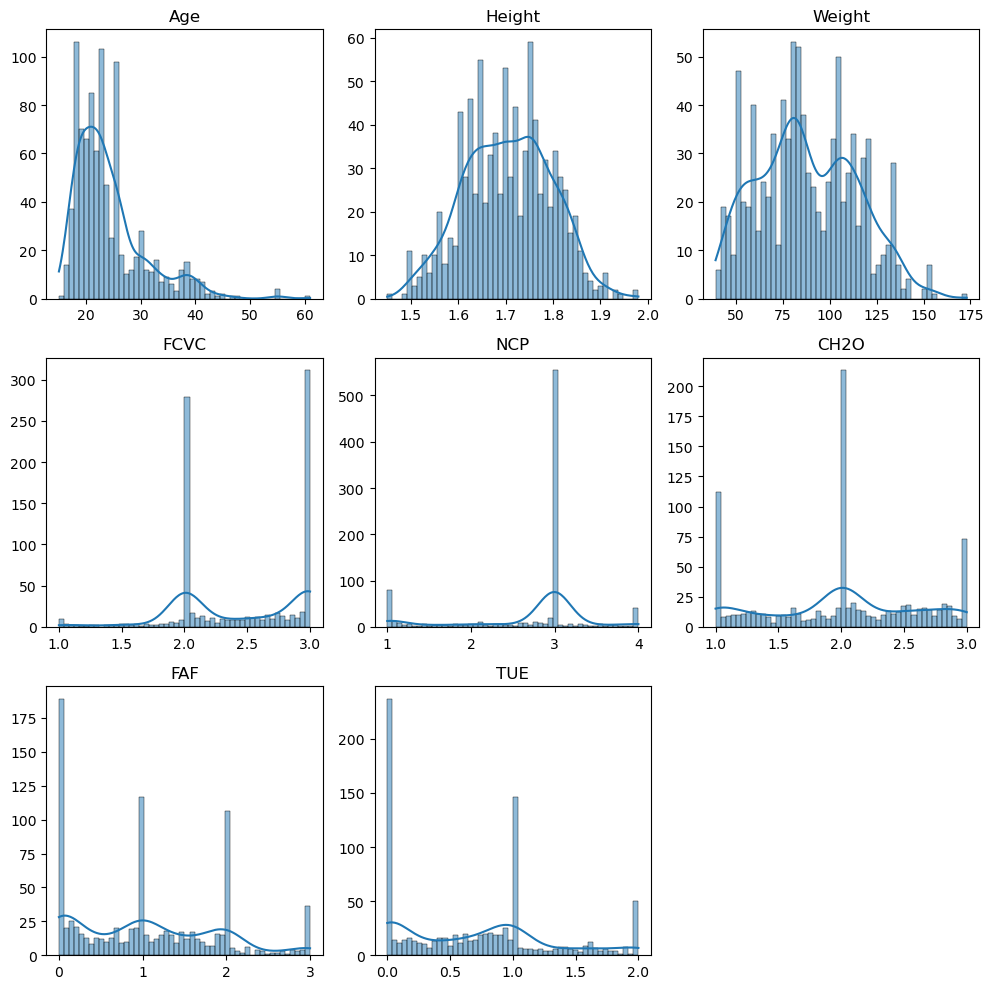

In [910]:

# visualizamos la distribución de las variables numéricas para comprobar que se han eliminado los outliers
plt.figure(figsize=(10, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

In [911]:
# Aparecen outliers en la columna Age, Weight, Height, por tanto vamos a eliminarlos
# Eliminamos aquellos valores para los que la edad sea superior a 50
df = df[df["Age"] <= 50]

# Eliminamos aquellos valores para los que el peso sea superior a 165
df = df[df["Weight"] <= 165]

# Eliminamos aquellos valores para los que la altura sea inferior a 1.46
df = df[df["Height"] >= 1.46]


c:\Users\charly\anaconda3\envs\ML1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\charly\anaconda3\envs\ML1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\charly\anaconda3\envs\ML1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\charly\anaconda3\envs\ML1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

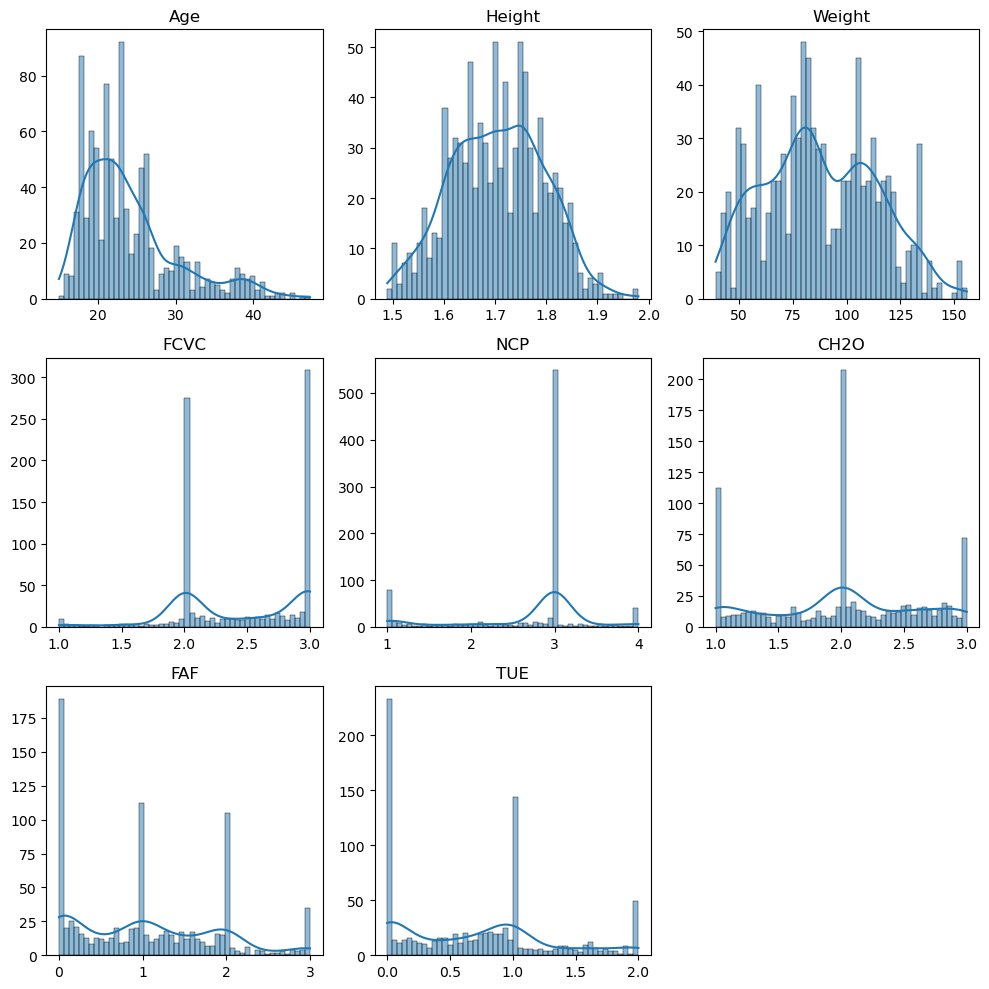

In [912]:
# visualizamos la distribución de las variables numéricas para comprobar que se han eliminado los outliers
plt.figure(figsize=(10, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

In [913]:
# Descripcion de las variables numericas despues de eleminar los outliers
df[num_cols].describe().round(2).style.format(precision=2).background_gradient(
    vmax=75, cmap="Blues"
)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,920.00,920.00,920.00,920.00,920.00,920.00,920.00,920.00
mean,24.04,1.70,87.84,2.44,2.71,2.00,1.03,0.70
std,6.05,0.09,26.02,0.52,0.75,0.62,0.85,0.60
min,15.00,1.49,39.10,1.00,1.00,1.00,0.00,0.00
25%,19.67,1.64,68.00,2.00,2.72,1.53,0.17,0.04
50%,22.82,1.70,85.00,2.46,3.00,2.00,1.00,0.72
75%,26.00,1.77,107.61,3.00,3.00,2.50,1.72,1.00
max,47.28,1.98,155.87,3.00,4.00,3.00,3.00,2.00


In [914]:
# Descripción de las variables categóricas
df[cat_cols].describe(include="category")


,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
count,920,920,920,920,920,920,920,920
unique,2,2,2,4,2,2,3,5
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
freq,472,759,820,796,905,876,615,691


c:\Users\charly\anaconda3\envs\ML1\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\charly\anaconda3\envs\ML1\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\charly\anaconda3\envs\ML1\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defau

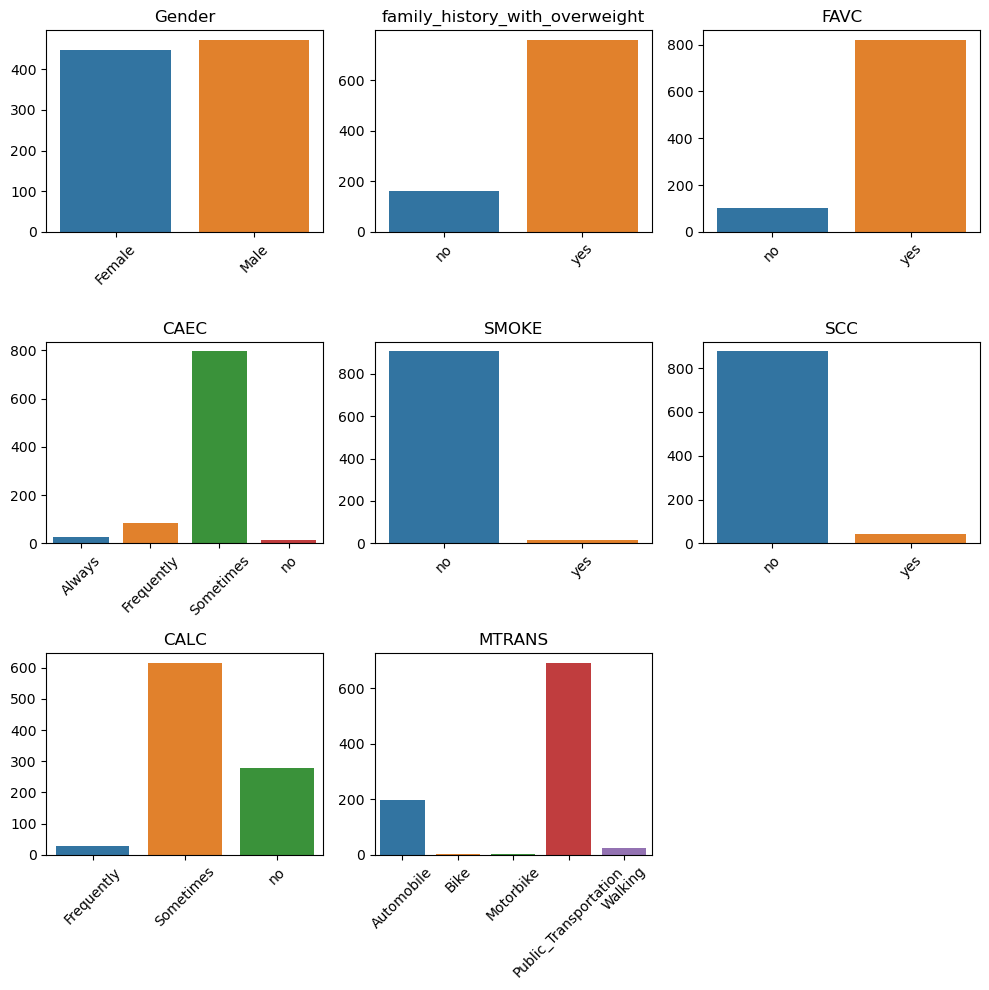

In [915]:
# Visualizamos la distribución de las variables categóricas en graficas 
plt.figure(figsize=(10, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()



### FEATURE ENGINEERING: Transformación de variables

In [916]:
# Hacemos una copia del dataframe original para no modificarlo donde tendremos realizada la feature engineering
df2 = df.copy()
df2.head()



,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
519,Female,18.535075,1.688025,45.000000,no,yes,3.000000,3.000000,Sometimes,no,3.000000,yes,2.539762,1.283673,no,Public_Transportation,Insufficient_Weight
826,Female,40.000000,1.561109,62.871794,yes,yes,2.948248,3.000000,Sometimes,no,2.429911,no,0.119640,0.360193,Sometimes,Automobile,Overweight_Level_I
838,Male,26.000000,1.745033,80.000000,yes,yes,2.217267,1.193589,Sometimes,no,2.000000,no,2.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I
1718,Male,25.879411,1.765464,114.144378,yes,yes,1.626369,3.000000,Sometimes,no,2.109697,no,1.352973,0.076693,Sometimes,Public_Transportation,Obesity_Type_II
1055,Male,33.000000,1.850000,97.920350,yes,yes,2.000000,3.000000,Sometimes,no,1.117464,no,1.000000,0.663649,Sometimes,Public_Transportation,Overweight_Level_II


In [917]:
df2['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         173
Obesity_Type_III       149
Obesity_Type_II        132
Overweight_Level_I     118
Normal_Weight          117
Overweight_Level_II    117
Insufficient_Weight    114
Name: count, dtype: int64

In [918]:
# Creamos una nueva columna que indique si el individuo tiene obesidad o no
df2['Obesity'] = df2['NObeyesdad'].apply(lambda x: 1 if x in ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'] else 0)


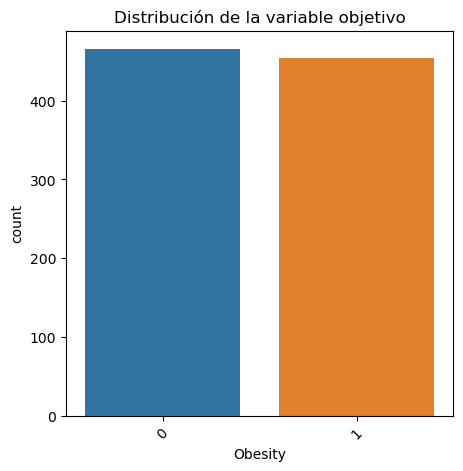

In [919]:
# Comprobamos que se ha creado la columna target Obesity y que esta bien balanceada
target = 'Obesity'

# Visualizamos la distribución de la variable objetivo
plt.figure(figsize=(5, 5))
sns.countplot(data=df2, x=target)
plt.title('Distribución de la variable objetivo')
plt.xticks(rotation=45)
plt.show()

In [920]:
# Tranformamos las variables numericas con minmaxscaler. Usamos este metodo ya que posteriormente nos permitirá usar k-best.

scaler = MinMaxScaler()
df2[num_cols] = scaler.fit_transform(df2[num_cols])
df2.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Obesity
519,Female,0.109501,0.404850,0.050511,no,yes,1.000000,0.666667,Sometimes,no,1.000000,yes,0.846587,0.641837,no,Public_Transportation,Insufficient_Weight,0
826,Female,0.774392,0.146150,0.203562,yes,yes,0.974124,0.666667,Sometimes,no,0.714956,no,0.039880,0.180096,Sometimes,Automobile,Overweight_Level_I,0
838,Male,0.340733,0.521053,0.350245,yes,yes,0.608634,0.064530,Sometimes,no,0.500000,no,0.666667,0.000000,Sometimes,Public_Transportation,Overweight_Level_I,0
1718,Male,0.336997,0.562699,0.642651,yes,yes,0.313184,0.666667,Sometimes,no,0.554849,no,0.450991,0.038346,Sometimes,Public_Transportation,Obesity_Type_II,1
1055,Male,0.557563,0.735013,0.503712,yes,yes,0.500000,0.666667,Sometimes,no,0.058732,no,0.333333,0.331825,Sometimes,Public_Transportation,Overweight_Level_II,0


In [921]:
# Tranformamos las variables categóricas con OneHotEncoder y las añadimos al dataframe

encoder = OneHotEncoder(drop='first', sparse=False)
encoder.fit(df2[cat_cols])
encoded_cols = encoder.get_feature_names_out(cat_cols)
df2[encoded_cols] = encoder.transform(df2[cat_cols])
df2.drop(columns=cat_cols, inplace=True)
df2.head()


c:\Users\charly\anaconda3\envs\ML1\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Obesity,...,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
519,0.109501,0.404850,0.050511,1.000000,0.666667,1.000000,0.846587,0.641837,Insufficient_Weight,0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
826,0.774392,0.146150,0.203562,0.974124,0.666667,0.714956,0.039880,0.180096,Overweight_Level_I,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
838,0.340733,0.521053,0.350245,0.608634,0.064530,0.500000,0.666667,0.000000,Overweight_Level_I,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1718,0.336997,0.562699,0.642651,0.313184,0.666667,0.554849,0.450991,0.038346,Obesity_Type_II,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1055,0.557563,0.735013,0.503712,0.500000,0.666667,0.058732,0.333333,0.331825,Overweight_Level_II,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [922]:
# Eliminamos la columna NObeyesdad ya que hemos creado la columna Obesity
df2.drop(columns='NObeyesdad', inplace=True)


c:\Users\charly\anaconda3\envs\ML1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


c:\Users\charly\anaconda3\envs\ML1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\charly\anaconda3\envs\ML1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\charly\anaconda3\envs\ML1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\charly\anaconda3\envs\ML1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

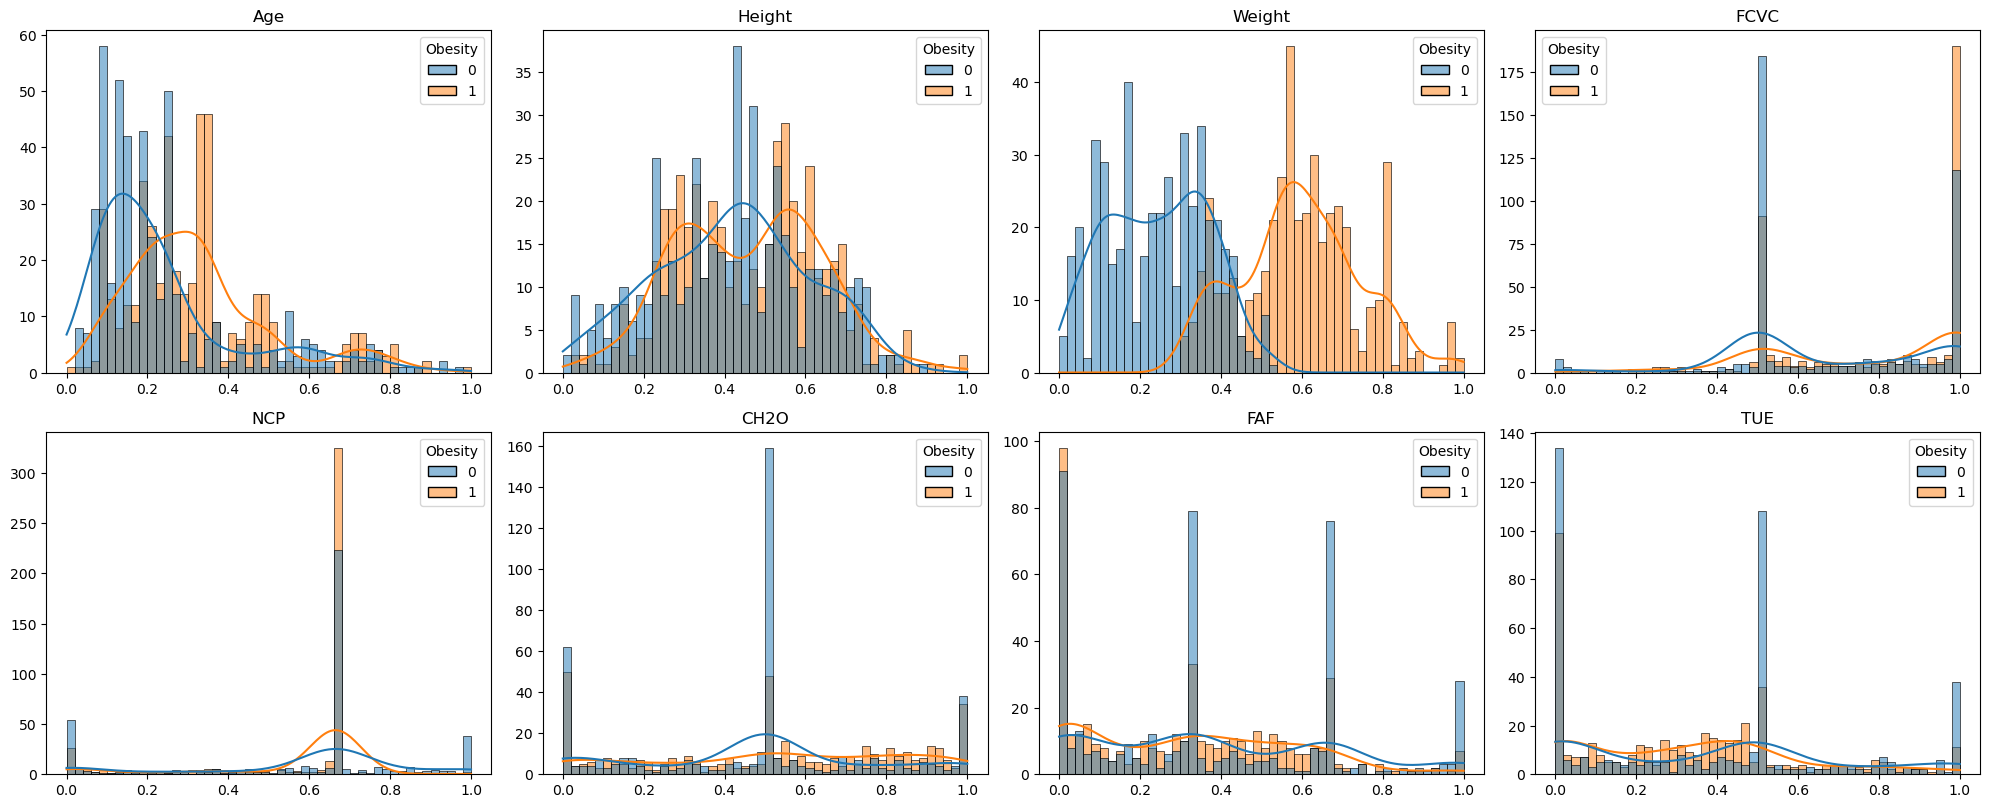

In [923]:
# Representamos a traves de distribuciones como se relacionan las variables numericas con la variable objetivo
plt.figure(figsize=(20, 20))
for i, col in enumerate(df2[num_cols]):
    plt.subplot(5, 4, i+1)
    sns.histplot(df2, x=col, hue='Obesity', bins=50, kde=True)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()


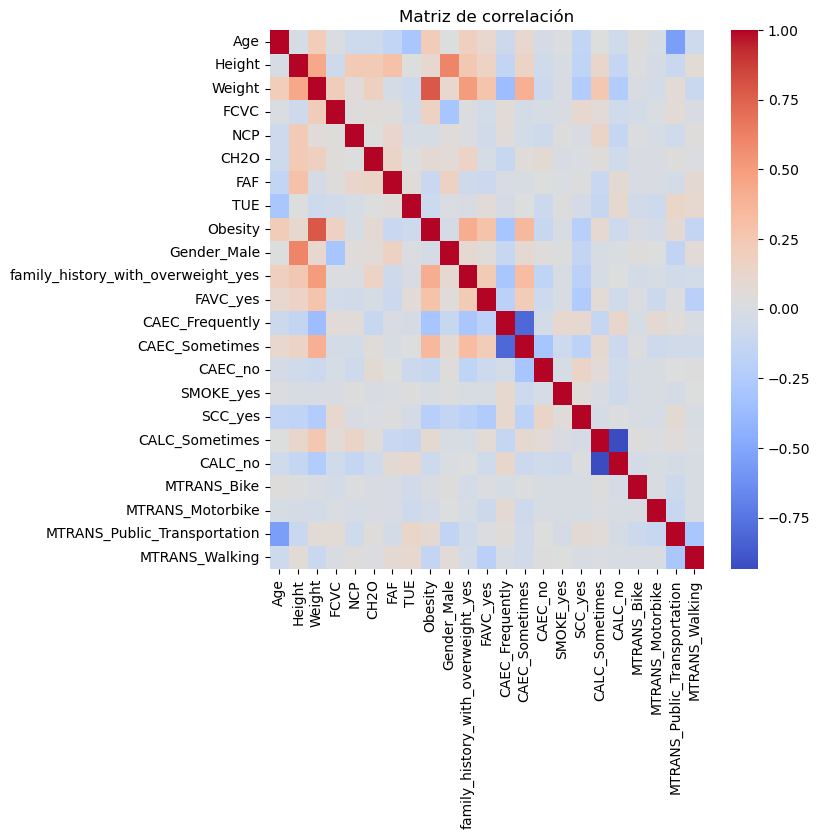

In [924]:
# Vemos la matriz de correlación
plt.figure(figsize=(7, 7))
sns.heatmap(df2.corr(), annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()


### FEATURE SELECTION: Selección de variables predictivas

In [925]:
# Usaremos dos metodos distintos para comprobar la importancia de las variables

<Figure size 1000x500 with 0 Axes>

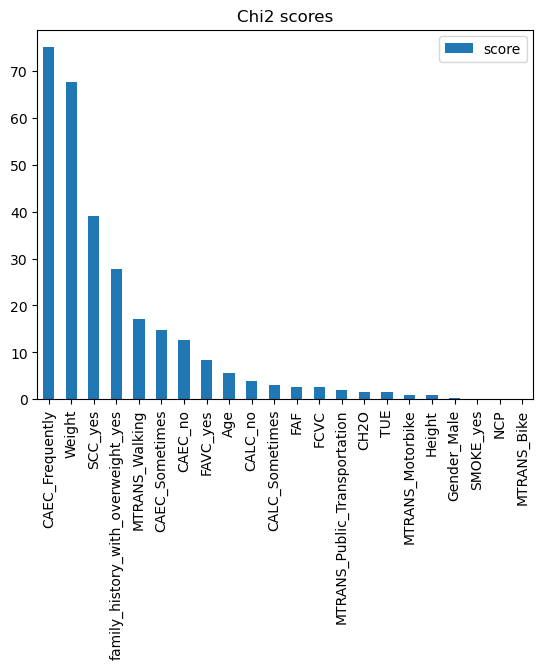

In [926]:
# Usamos chi2 para estudiar la relación entre las variables y la variable objetivo

# Separamos las variables predictoras de la variable objetivo
X = df2.drop(columns=target)
y = df2[target]

# Aplicamos el método de selección de variables
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(X, y)

fit.transform(X)

# Creamos un dataframe con los resultados
scores = pd.DataFrame(fit.scores_, index=X.columns, columns=['score']).sort_values(by='score', ascending=False)
scores

# Visualizamos los resultados
plt.figure(figsize=(10, 5))
scores.plot(kind='bar')
plt.title('Chi2 scores')
plt.show()






<Figure size 1000x500 with 0 Axes>

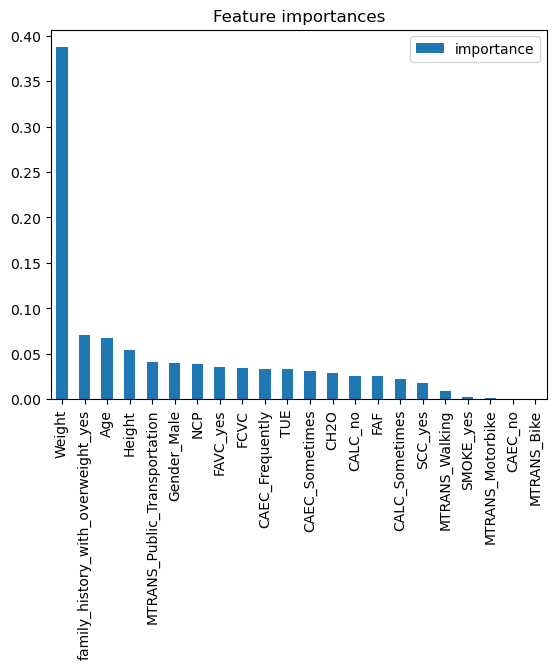

In [927]:
# Usamos feature_importances_ para estudiar la relación entre las variables y la variable objetivo

model = ExtraTreesClassifier(n_estimators=10, random_state=seed)
model.fit(X, y)

# Creamos un dataframe con los resultados
importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance']).sort_values(by='importance', ascending=False)
importances

# Visualizamos los resultados
plt.figure(figsize=(10, 5))
importances.plot(kind='bar')
plt.title('Feature importances')
plt.show()



In [928]:
# A partir de estos resultados seleccionamos las variables que consideramos más importantes para crear distintos modelos

In [929]:
# Vamos a estudiar 3 modelos de regresión logistica, cada modelo usará las siguiente variables:
var_model1 = ['Age', 'Weight', 'Height', 'family_history_with_overweight_yes', 'CAEC_Frequently', 'SCC_yes', 'MTRANS_Walking']
var_model2 = ['Age', 'Weight', 'Height', 'family_history_with_overweight_yes']
var_model3 = ['Weight', 'family_history_with_overweight_yes', 'CAEC_Frequently', 'SCC_yes', ]


Accuracy: 0.9420289855072463
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       150
           1       0.90      0.98      0.94       126

    accuracy                           0.94       276
   macro avg       0.94      0.94      0.94       276
weighted avg       0.94      0.94      0.94       276



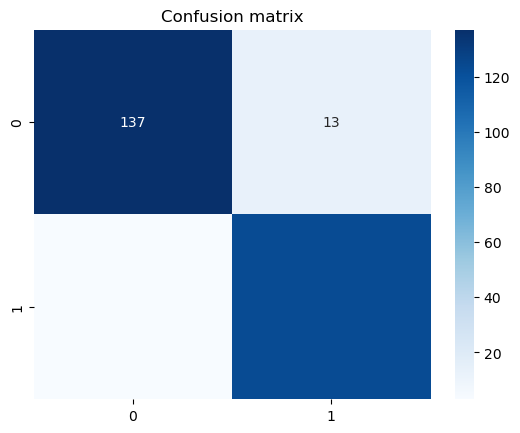

In [930]:
# Hacemos el modelo 1

# Separamos las variables predictoras de la variable objetivo
X1 = df2[var_model1]
y1 = df2[target]

# Dividimos el dataset en train y test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=seed)

# Creamos el modelo
model1 = LogisticRegression(random_state=seed)
model1.fit(X_train1, y_train1)

# Hacemos predicciones
y_pred1 = model1.predict(X_test1)

# Evaluamos el modelo
print('Accuracy:', accuracy_score(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))
sns.heatmap(confusion_matrix(y_test1, y_pred1), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion matrix')
plt.show()




Accuracy: 0.9384057971014492
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       150
           1       0.90      0.97      0.93       126

    accuracy                           0.94       276
   macro avg       0.94      0.94      0.94       276
weighted avg       0.94      0.94      0.94       276



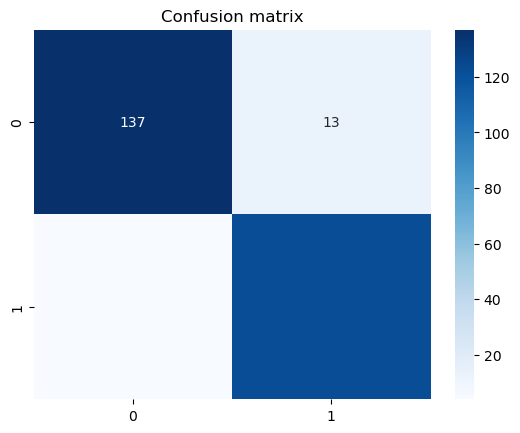

In [931]:
# Hacemos el modelo 2

# Separamos las variables predictoras de la variable objetivo
X2 = df2[var_model2]
y2 = df2[target]

# Dividimos el dataset en train y test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=seed)

# Creamos el modelo
model2 = LogisticRegression(random_state=seed)
model2.fit(X_train2, y_train2)

# Hacemos predicciones
y_pred2 = model2.predict(X_test2)

# Evaluamos el modelo
print('Accuracy:', accuracy_score(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))
sns.heatmap(confusion_matrix(y_test2, y_pred2), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion matrix')
plt.show()





Accuracy: 0.8478260869565217
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       150
           1       0.80      0.88      0.84       126

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



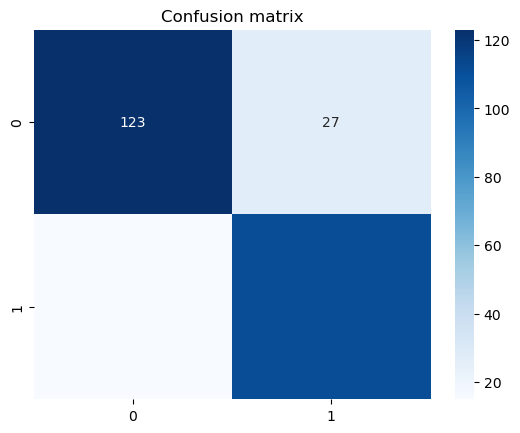

In [932]:
# Hacemos el modelo 3

# Separamos las variables predictoras de la variable objetivo
X3 = df2[var_model3]
y3 = df2[target]

# Dividimos el dataset en train y test
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=seed)

# Creamos el modelo
model3 = LogisticRegression(random_state=seed)
model3.fit(X_train3, y_train3)

# Hacemos predicciones
y_pred3 = model3.predict(X_test3)

# Evaluamos el modelo
print('Accuracy:', accuracy_score(y_test3, y_pred3))
print(classification_report(y_test3, y_pred3))
sns.heatmap(confusion_matrix(y_test3, y_pred3), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion matrix')
plt.show()



In [933]:
# Por tanto el mejor modelo será el modelo 1 ya que tiene una mayor precisión y menor número de falsos positivos y falsos negativos

In [934]:
# Se comparan los accuracy de los modelos
accuracy_model1 = accuracy_score(y_test1, y_pred1)
accuracy_model2 = accuracy_score(y_test2, y_pred2)
accuracy_model3 = accuracy_score(y_test3, y_pred3)
# Se muestran los resultados
print('Accuracy modelo 1:', accuracy_model1)
print('Accuracy modelo 2:', accuracy_model2)
print('Accuracy modelo 3:', accuracy_model3)


Accuracy modelo 1: 0.9420289855072463
Accuracy modelo 2: 0.9384057971014492
Accuracy modelo 3: 0.8478260869565217


In [935]:
# Segun la teoría podemos calcular el numero de nodos de la capa oculta de forma aproximada
# h * ( k + 1 ) + h + 1 = num_obs / 20
# siendo h el numero de nodos de la capa oculta y k el numero de variables predictoras

# Calculamos el numero de nodos de la capa oculta
k = len(var_model1)
num_obs = df2.shape[0]
h = ( (num_obs / 20) - 1) / (k + 2)
h


5.0

In [936]:
# Por tanto ya sabemos de entrada un valor aproximado para el numero de nodos de la capa oculta con el que empezar a trabajar

In [937]:
# Encontraremos la mejor red neuronal en términos del Accuracy usando las variables del modelo 1.
# Usaremos el metodo de GridSearchCV para encontrar la mejor red neuronal

# Separamos las variables predictoras de la variable objetivo
X = df2[var_model1]
y = df2[target]

# Dividimos el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Creamos el modelo
red = MLPClassifier(random_state=seed)

# Definimos los hiperparámetros
param_grid = {
    'hidden_layer_sizes': [5,6,7],
    'activation': ['tanh', 'relu'],
    'max_iter': [2000],
    'alpha': [0.0001, 0.001],
}

# Definimos las métricas de evaluación
scoring_metrics = ['accuracy','roc_auc', 'precision', 'recall', 'f1']

# Aplicamos GridSearchCV
grid = GridSearchCV(estimator=red, param_grid=param_grid, cv=5, scoring=scoring_metrics, refit='accuracy')
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=3314),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [5, 6, 7], 'max_iter': [2000]},
             refit='accuracy',
             scoring=['accuracy', 'roc_auc', 'precision', 'recall', 'f1'])

In [938]:
# Obtener el mejor modelo
best_model = grid.best_estimator_
print(grid.best_estimator_)
y_pred_rf = best_model.predict(X_test)
accuracy_rf_gs = accuracy_score(y_test, y_pred_rf)

# Evaluar el rendimiento del modelo
print(f'Precisión accuracy del modelo: {accuracy_rf_gs}')

MLPClassifier(activation='tanh', hidden_layer_sizes=5, max_iter=2000,
              random_state=3314)
Precisión accuracy del modelo: 0.9945652173913043


In [939]:
# Se procede a observar el posible sobreajuste comparando predicciones en train y test.
# predicciones significativamente mayores en train que en test puede indicar sobreajuste.
# Predicciones en conjunto de entrenamiento y prueba
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(f'Se tiene un accuracy para train de: {accuracy_score(y_train,y_train_pred)}')
print(f'Se tiene un accuracy para test de: {accuracy_score(y_test,y_test_pred)}')
print('Comprobar que la diferencia no sea muy grande por temas de sobreajuste')

Se tiene un accuracy para train de: 0.998641304347826
Se tiene un accuracy para test de: 0.9945652173913043
Comprobar que la diferencia no sea muy grande por temas de sobreajuste


In [940]:
print('Resultados para Modelo')
print(classification_report(y_test, y_test_pred))

Resultados para Modelo
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       101
           1       0.99      1.00      0.99        83

    accuracy                           0.99       184
   macro avg       0.99      1.00      0.99       184
weighted avg       0.99      0.99      0.99       184



In [941]:
# Mostramos como se distribuye la variable target en la parte train y test
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


(Obesity
 1    0.504076
 0    0.495924
 Name: proportion, dtype: float64,
 Obesity
 0    0.548913
 1    0.451087
 Name: proportion, dtype: float64)

In [942]:
# Afirmamos que esta distribución es similar en ambas partes, por tanto no hay desbalanceo en la variable objetivo

In [943]:
# Mostramos los resultados ordenando de mayor a menor por accuracy
results = pd.DataFrame(grid.cv_results_).sort_values(by='mean_test_accuracy', ascending=False)
results[['mean_test_accuracy', 'mean_test_roc_auc', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1', 'params']].head(10)

,mean_test_accuracy,mean_test_roc_auc,mean_test_precision,mean_test_recall,mean_test_f1,params
0,0.990495,0.997927,0.994805,0.986486,0.990547,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde..."
1,0.990495,0.997779,0.994805,0.986486,0.990547,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde..."
2,0.990495,0.997631,0.994805,0.986486,0.990547,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde..."
3,0.990495,0.997927,0.994805,0.986486,0.990547,"{'activation': 'tanh', 'alpha': 0.001, 'hidden..."
4,0.990495,0.997890,0.994805,0.986486,0.990547,"{'activation': 'tanh', 'alpha': 0.001, 'hidden..."
5,0.990495,0.997631,0.994805,0.986486,0.990547,"{'activation': 'tanh', 'alpha': 0.001, 'hidden..."
6,0.990495,0.997816,0.994805,0.986486,0.990547,"{'activation': 'relu', 'alpha': 0.0001, 'hidde..."
8,0.990495,0.997520,0.994805,0.986486,0.990547,"{'activation': 'relu', 'alpha': 0.0001, 'hidde..."
9,0.990495,0.997816,0.994805,0.986486,0.990547,"{'activation': 'relu', 'alpha': 0.001, 'hidden..."
11,0.990495,0.997520,0.994805,0.986486,0.990547,"{'activation': 'relu', 'alpha': 0.001, 'hidden..."


In [944]:
# se seleccionan las 3 redes candidatas y se analiza su robustez a lo largo de cross validation.
ac_1 = results[['split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy']].iloc[0]
ac_2 = results[['split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy']].iloc[1]
ac_3 = results[['split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy']].iloc[2]


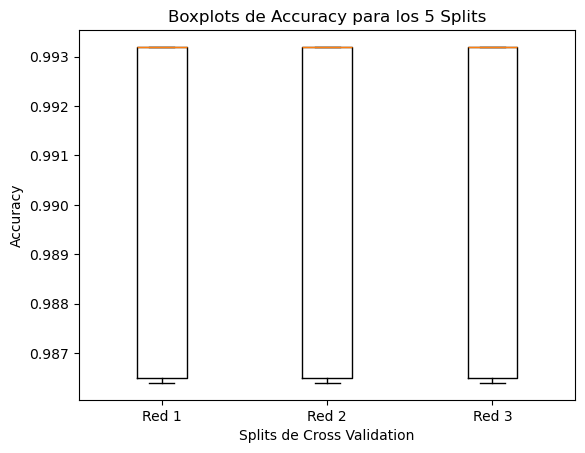

In [945]:
# Crear un boxplot para los valores de accuracy de las 3 redes
plt.boxplot([ac_1.values, ac_2.values, ac_3.values], labels = ['Red 1', 'Red 2', 'Red 3'])
plt.title('Boxplots de Accuracy para los 5 Splits')
plt.xlabel('Splits de Cross Validation')
plt.ylabel('Accuracy')
plt.show()

In [946]:
# Por tanto en términos de accuracy no nos importa tanto la red que seleccionemos ya que todas tienen un accuracy y una varianza similar. En este caso nos quedamos con la red 3.


Área bajo la curva ROC (AUC) para la red en test: 1.00


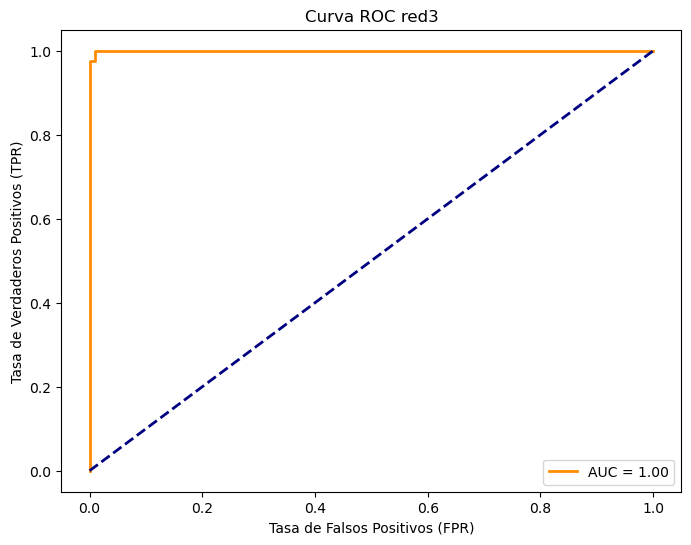

In [947]:
red_log = MLPClassifier(**results.iloc[2].params)
red_log.fit(X_train, y_train)
y_pred_log = red_log.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log)
roc_auc = auc(fpr, tpr)
print(f"\nÁrea bajo la curva ROC (AUC) para la red en test: {roc_auc:.2f}")
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC red3')
plt.legend(loc="lower right")
plt.show()


In [948]:
# Es obvio el sobreajuste del modelo ya que el area bajo la curva ROC es 1.

In [949]:
# Seleccionamos el mejor modelo y lo guardamos para compararlo posteriormente con otras redes.
# _log hará referencia a que las variables predictoras han sido seleccionadas a través de un modelo de regresión logística
ac_log = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy']].iloc[2]
auc_log = results[['split0_test_roc_auc', 'split1_test_roc_auc','split2_test_roc_auc', 'split3_test_roc_auc', 'split4_test_roc_auc']].iloc[2]


###  2)	Aplicar un proceso de selección de variables select k best, tomando k=4. Con las variables obtenidas. Encontrar el mejor modelo de red neuronal en términos de AUC. Justificar las parametrizaciones probadas y los parámetros escogidos

<Figure size 1000x500 with 0 Axes>

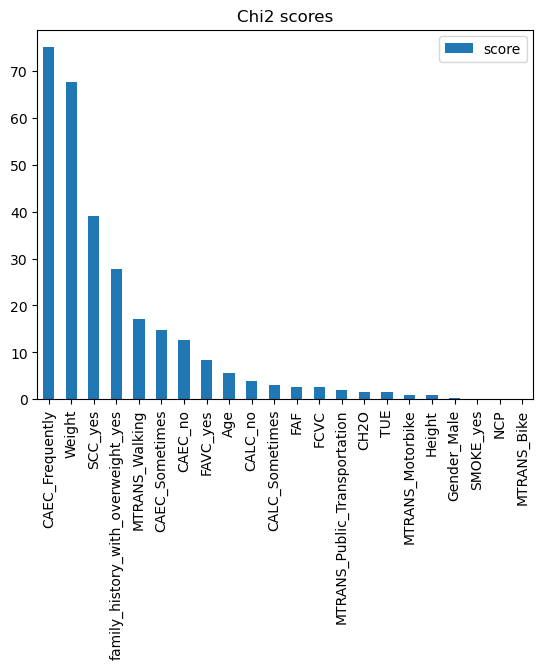

In [950]:
# Usamos chi2 para estudiar la relación entre las variables y la variable objetivo

# Separamos las variables predictoras de la variable objetivo
X = df2.drop(columns=target)
y = df2[target]

# Aplicamos el método de selección de variables
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

fit.transform(X)

# Creamos un dataframe con los resultados
scores = pd.DataFrame(fit.scores_, index=X.columns, columns=['score']).sort_values(by='score', ascending=False)
scores

# Visualizamos los resultados
plt.figure(figsize=(10, 5))
scores.plot(kind='bar')
plt.title('Chi2 scores')
plt.show()


In [951]:
# Encontraremos la mejor red neuronal en términos del AUC usando las variables seleccionadas por SelectKBest.
# Usaremos el metodo de GridSearchCV para encontrar la mejor red neuronal

# Separamos las variables predictoras de la variable objetivo
X = df2[scores.index[:4]]
y = df2[target]

# Dividimos el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Creamos el modelo
red = MLPClassifier(random_state=seed)

# Definimos los hiperparámetros
param_grid = {
    'hidden_layer_sizes': [3,5,6,7],
    'activation': ['tanh', 'relu'],
    'max_iter': [2000],
    'alpha': [0.0001, 0.001]
}

# Definimos las métricas de evaluación
scoring_metrics = ['accuracy', 'roc_auc', 'precision_macro', 'recall_macro', 'f1_macro', ]

# Usamos GridSearchCV para encontrar la mejor red neuronal
grid = GridSearchCV(estimator=red, param_grid=param_grid, cv=5, scoring=scoring_metrics, refit='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=3314),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [3, 5, 6, 7],
                         'max_iter': [2000]},
             refit='roc_auc',
             scoring=['accuracy', 'roc_auc', 'precision_macro', 'recall_macro',
                      'f1_macro'])

In [952]:
# Obtener el mejor modelo
best_model = grid.best_estimator_
print(grid.best_estimator_)
y_pred_rf = best_model.predict(X_test)
accuracy_rf_gs = accuracy_score(y_test, y_pred_rf)

# Evaluar el rendimiento del modelo
print(f'Precisión del modelo: {accuracy_rf_gs}')

MLPClassifier(activation='tanh', hidden_layer_sizes=5, max_iter=2000,
              random_state=3314)
Precisión del modelo: 0.8315217391304348


In [953]:
# Se procede a observar el posible sobreajuste comparando predicciones en train y test.
# predicciones significativamente mayores en train que en test puede indicar sobreajuste.
# Predicciones en conjunto de entrenamiento y prueba
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(f'Se tiene un accuracy para train de: {accuracy_score(y_train,y_train_pred)}')
print(f'Se tiene un accuracy para test de: {accuracy_score(y_test,y_test_pred)}')
print('Comprobar que la diferencia no sea muy grande por temas de sobreajuste')

Se tiene un accuracy para train de: 0.8980978260869565
Se tiene un accuracy para test de: 0.8315217391304348
Comprobar que la diferencia no sea muy grande por temas de sobreajuste


In [954]:
print('Resultados para Modelo')
print(classification_report(y_test, y_test_pred))

Resultados para Modelo
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       101
           1       0.79      0.86      0.82        83

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



In [955]:
# Mostramos como se distribuye la variable target en la parte train y test
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


(Obesity
 1    0.504076
 0    0.495924
 Name: proportion, dtype: float64,
 Obesity
 0    0.548913
 1    0.451087
 Name: proportion, dtype: float64)

In [956]:
# Mostramos los resultados ordenando de mayor a menor por AUC
results = pd.DataFrame(grid.cv_results_).sort_values(by='mean_test_roc_auc', ascending=False)
results[['param_hidden_layer_sizes', 'param_activation', 'param_alpha', 'mean_test_roc_auc', 'mean_test_accuracy', 'mean_test_precision_macro', 'mean_test_recall_macro', 'mean_test_f1_macro']].head(10)

,param_hidden_layer_sizes,param_activation,param_alpha,mean_test_roc_auc,mean_test_accuracy,mean_test_precision_macro,mean_test_recall_macro,mean_test_f1_macro
1,5,tanh,0.0001,0.971127,0.894052,0.895744,0.894201,0.893920
5,5,tanh,0.001,0.971127,0.894052,0.895744,0.894201,0.893920
2,6,tanh,0.0001,0.970906,0.894052,0.896000,0.894219,0.893904
6,6,tanh,0.001,0.970906,0.894052,0.896000,0.894219,0.893904
3,7,tanh,0.0001,0.970758,0.895413,0.897412,0.895571,0.895261
7,7,tanh,0.001,0.970758,0.895413,0.897412,0.895571,0.895261
10,6,relu,0.0001,0.970721,0.898134,0.900958,0.898421,0.897953
14,6,relu,0.001,0.970647,0.898134,0.900958,0.898421,0.897953
0,3,tanh,0.0001,0.970350,0.892692,0.894487,0.892850,0.892556
4,3,tanh,0.001,0.970350,0.892692,0.894487,0.892850,0.892556


In [957]:
# se seleccionan las 3 redes candidatas y se analiza su robustez del AUC a lo largo de cross validation.
auc_1 = results[['split0_test_roc_auc', 'split1_test_roc_auc','split2_test_roc_auc', 'split3_test_roc_auc', 'split4_test_roc_auc']].iloc[0]
auc_2 = results[['split0_test_roc_auc', 'split1_test_roc_auc','split2_test_roc_auc', 'split3_test_roc_auc', 'split4_test_roc_auc']].iloc[2]
auc_3 = results[['split0_test_roc_auc', 'split1_test_roc_auc','split2_test_roc_auc', 'split3_test_roc_auc', 'split4_test_roc_auc']].iloc[4]

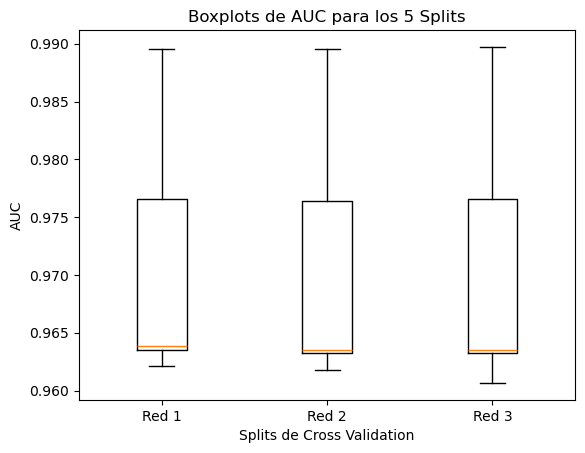

In [958]:
# Crear un boxplot para los valores de AUC de las 3 redes
plt.boxplot([auc_1.values, auc_2.values, auc_3.values], labels = ['Red 1', 'Red 2', 'Red 3'])
plt.title('Boxplots de AUC para los 5 Splits')
plt.xlabel('Splits de Cross Validation')
plt.ylabel('AUC')
plt.show()


In [959]:
# Seleccionamos la red que tengo mayor AUC y menor varianza
# Apenas hay diferencia entre las 3 redes en términos de AUC, por tanto nos quedaremos con la red 3 ya que al menos tiene mejor accuracy que las otras dos.


In [960]:
# Seleccionamos el mejor modelo y lo guardamos para compararlo posteriormente con otras redes.
# _k hará referencia a que las variables predictoras han sido seleccionadas a través de select k best
ac_k = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy']].iloc[4]
auc_k = results[['split0_test_roc_auc', 'split1_test_roc_auc','split2_test_roc_auc', 'split3_test_roc_auc', 'split4_test_roc_auc']].iloc[4]



Área bajo la curva ROC (AUC) para la red 2 en test: 0.94


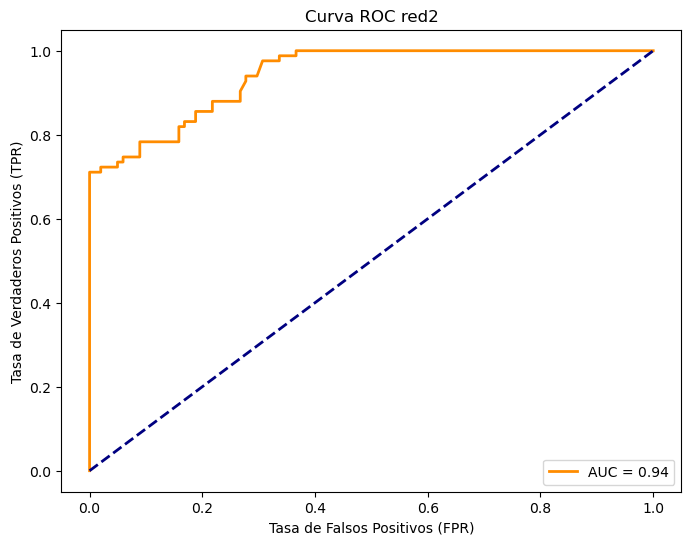

In [961]:
red_k = MLPClassifier(**results.iloc[4].params)
red_k.fit(X_train, y_train)

y_pred_k = red_k.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_k)
roc_auc = auc(fpr, tpr)

print(f"\nÁrea bajo la curva ROC (AUC) para la red 2 en test: {roc_auc:.2f}")

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC red2')
plt.legend(loc="lower right")
plt.show()


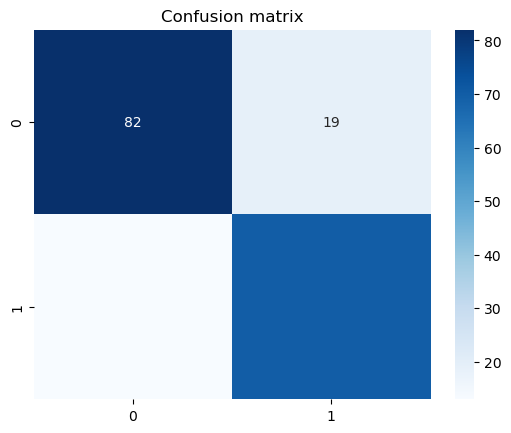

In [962]:
# Hacemos predicciones
y_pred_k = red_k.predict(X_test)

# Matriz de confusion
sns.heatmap(confusion_matrix(y_test, y_pred_k), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion matrix')
plt.show()

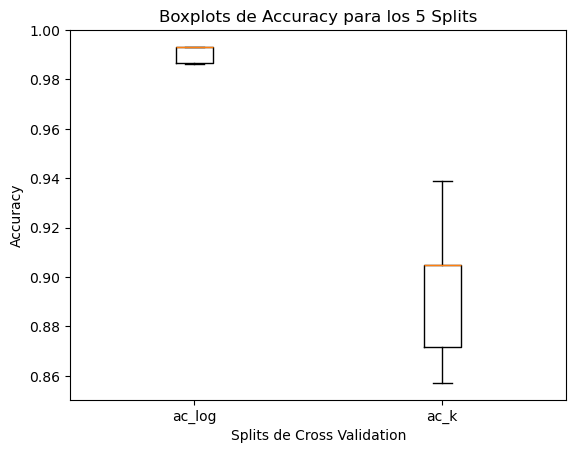

In [963]:
# Comparamos el accuracy mediante boxplot de ac_log y ac_k
plt.boxplot([ac_log.values, ac_k.values], labels = ['ac_log', 'ac_k'])
plt.title('Boxplots de Accuracy para los 5 Splits')
plt.xlabel('Splits de Cross Validation')
plt.ylabel('Accuracy')
plt.show()


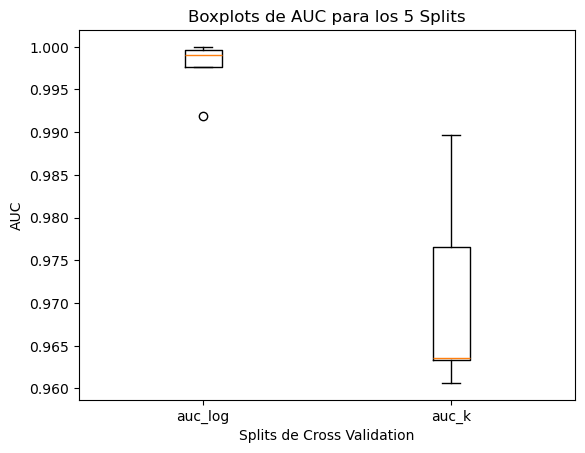

In [964]:
# Comparamos el AUC mediante boxplot de auc_log y auc_k
plt.boxplot([auc_log.values, auc_k.values], labels = ['auc_log', 'auc_k'])
plt.title('Boxplots de AUC para los 5 Splits')
plt.xlabel('Splits de Cross Validation')
plt.ylabel('AUC')
plt.show()


In [965]:
# Seleccionaremos la red obtenida a través de las variables que escogimos primeramente a través de un modelo de regresión logística.
# Esta red tiene como muestran las gráficas un mejor valor de accuracy, AUC y curva ROC que la red con las variables obtenidas a través de SelectKBest

### 4)	Realizar la mejor búsqueda paramétrica para lograr el mejor árbol según cuatro métodos de validación de la bondad de la clasificación diferentes. Para el árbol ganador representarlo gráficamente, mostrar sus reglas en formato texto y graficar la importancia de sus variables.

### Decision Tree Classifier

In [966]:
# Realizamos la busqueda del mejor arbol de decisión usando gridsearchcv

# Separamos las variables predictoras de la variable objetivo
X = df2[var_model1]
y = df2[target]

# Dividimos el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Creamos el modelo
tree = DecisionTreeClassifier(random_state=seed)

# Definimos los hiperparámetros
param_grid = {
    'max_depth': [1,2,3,4],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 7],
}

# Definimos las métricas de evaluación
scoring_metrics = ['accuracy', 'roc_auc', 'precision_macro', 'recall_macro', 'f1_macro']

# Usamos GridSearchCV para encontrar el mejor árbol de decisión
grid = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring=scoring_metrics, refit='accuracy')
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=3314),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 7]},
             refit='accuracy',
             scoring=['accuracy', 'roc_auc', 'precision_macro', 'recall_macro',
                      'f1_macro'])

In [967]:
# Obtener el mejor modelo
best_model = grid.best_estimator_
print(grid.best_estimator_)
y_pred_rf = best_model.predict(X_test)
accuracy_rf_gs = accuracy_score(y_test, y_pred_rf)

# Evaluar el rendimiento del modelo
print(f'Precisión del modelo: {accuracy_rf_gs}')

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=3314)
Precisión del modelo: 0.967391304347826


In [968]:
# Se procede a observar el posible sobreajuste comparando predicciones en train y test.
# predicciones significativamente mayores en train que en test puede indicar sobreajuste.
# Predicciones en conjunto de entrenamiento y prueba
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(f'Se tiene un accuracy para train de: {accuracy_score(y_train,y_train_pred)}')
print(f'Se tiene un accuracy para test de: {accuracy_score(y_test,y_test_pred)}')
print('Comprobar que la diferencia no sea muy grande por temas de sobreajuste')

Se tiene un accuracy para train de: 0.9836956521739131
Se tiene un accuracy para test de: 0.967391304347826
Comprobar que la diferencia no sea muy grande por temas de sobreajuste


In [969]:
print('Resultados para Modelo')
print(classification_report(y_test, y_test_pred))

Resultados para Modelo
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       101
           1       0.93      1.00      0.97        83

    accuracy                           0.97       184
   macro avg       0.97      0.97      0.97       184
weighted avg       0.97      0.97      0.97       184



In [970]:
# Mostramos como se distribuye la variable target en la parte train y test
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


(Obesity
 1    0.504076
 0    0.495924
 Name: proportion, dtype: float64,
 Obesity
 0    0.548913
 1    0.451087
 Name: proportion, dtype: float64)

In [971]:
# Mostramos los resultados ordenando de mayor a menor por accuracy
results = pd.DataFrame(grid.cv_results_).sort_values(by='mean_test_accuracy', ascending=False)
results[['param_max_depth', 'param_criterion', 'param_min_samples_split', 'mean_test_accuracy', 'mean_test_roc_auc', 'mean_test_precision_macro', 'mean_test_recall_macro', 'mean_test_f1_macro']].head(10)

,param_max_depth,param_criterion,param_min_samples_split,mean_test_accuracy,mean_test_roc_auc,mean_test_precision_macro,mean_test_recall_macro,mean_test_f1_macro
18,3,entropy,2,0.974186,0.986796,0.974794,0.974065,0.974170
20,3,entropy,7,0.974186,0.986796,0.974794,0.974065,0.974170
19,3,entropy,5,0.974186,0.986796,0.974794,0.974065,0.974170
9,4,gini,2,0.972817,0.983791,0.973167,0.972806,0.972808
10,4,gini,5,0.972817,0.983791,0.973167,0.972806,0.972808
6,3,gini,2,0.971456,0.983373,0.971831,0.971436,0.971446
7,3,gini,5,0.971456,0.983373,0.971831,0.971436,0.971446
8,3,gini,7,0.971456,0.983373,0.971831,0.971436,0.971446
11,4,gini,7,0.971456,0.983754,0.971851,0.971455,0.971447
23,4,entropy,7,0.967384,0.986808,0.968331,0.967345,0.967360


In [972]:
# Se seleccionan los 3 árboles candidatos y se analiza su robustez a lo largo de cross validation.
tree_1 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[0]
tree_2 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[3]
tree_3 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[5]

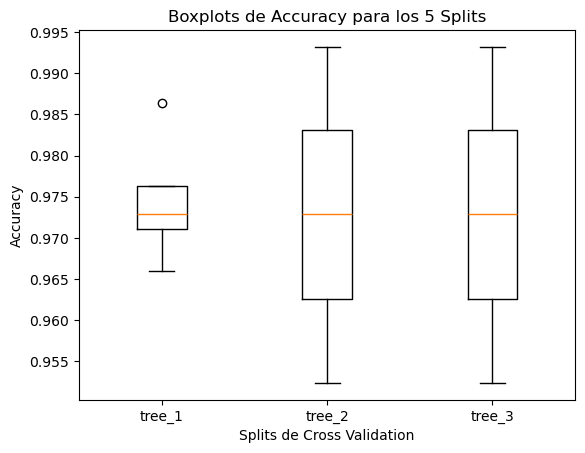

In [973]:
# Crear un boxplot para los 3 valores de accuracy
plt.boxplot([tree_1.values,tree_2.values,tree_3.values], labels = ['tree_1','tree_2','tree_3'])
plt.title('Boxplots de Accuracy para los 5 Splits')
plt.xlabel('Splits de Cross Validation')
plt.ylabel('Accuracy')
plt.show()

In [974]:
# Por tanto seleccionamos el tree_1 ya que tiene una mayor precisión y menor varianza


Área bajo la curva ROC (AUC) para el árbol 1 en test: 0.98


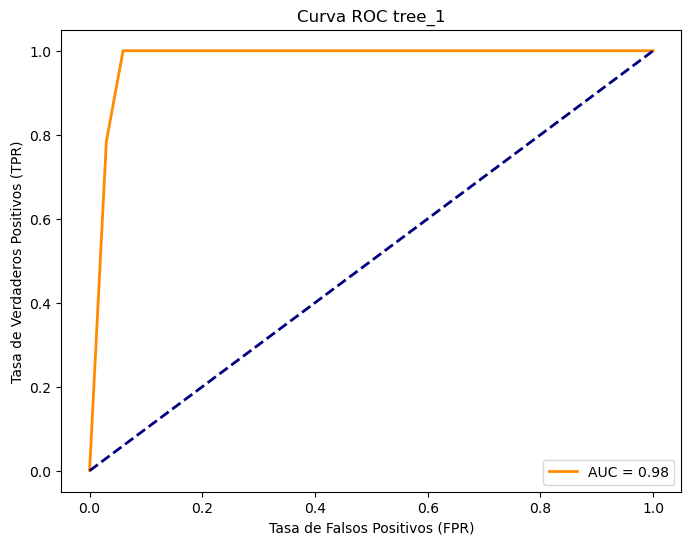

In [975]:
# Hacemos predicciones con el mejor árbol de decisión
tree = DecisionTreeClassifier(**results.iloc[0].params)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_tree)
roc_auc = auc(fpr, tpr)
print(f"\nÁrea bajo la curva ROC (AUC) para el árbol 1 en test: {roc_auc:.2f}")

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC tree_1')
plt.legend(loc="lower right")
plt.show()

In [976]:
# Hacemos predicciones
tree = DecisionTreeClassifier(**results.iloc[0].params)
predictor = tree.fit(X_train, y_train).predict(X_test)

# Matriz de confusión
print(confusion_matrix(y_test, predictor))

[[95  6]
 [ 0 83]]


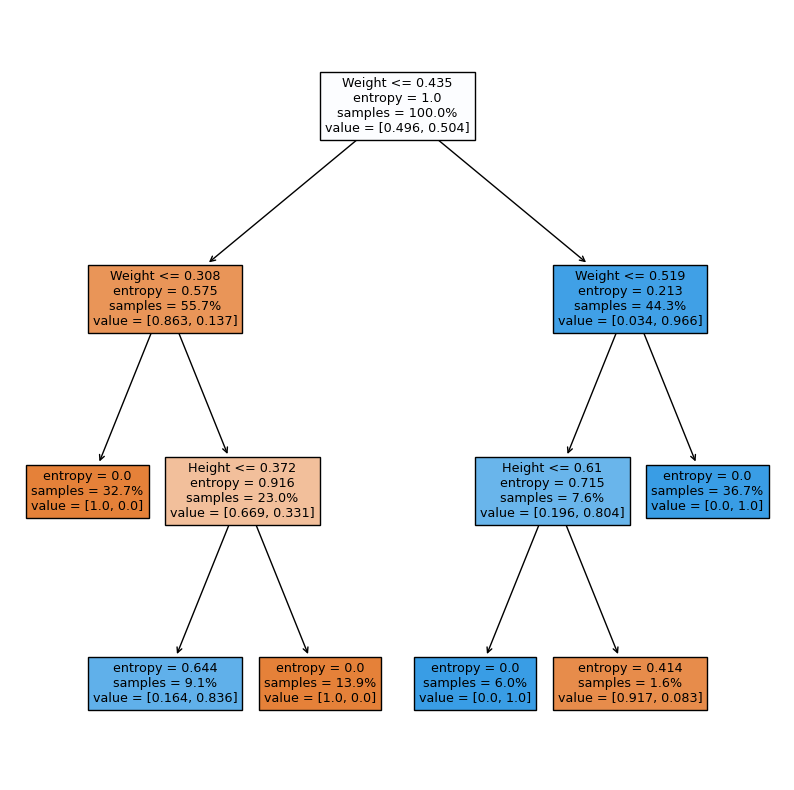

In [977]:
# Representamos graficamente el arbol de decisión

plt.figure(figsize=(10,10))
plot_tree(tree, feature_names=X.columns.tolist(), filled=True, proportion=True)
plt.show()


In [978]:
# Mostramos las reglas en formato texto del árbol de decisión
from sklearn.tree import export_text
r = export_text(tree, feature_names=X.columns.tolist())
print(r)


|--- Weight <= 0.44
|   |--- Weight <= 0.31
|   |   |--- class: 0
|   |--- Weight >  0.31
|   |   |--- Height <= 0.37
|   |   |   |--- class: 1
|   |   |--- Height >  0.37
|   |   |   |--- class: 0
|--- Weight >  0.44
|   |--- Weight <= 0.52
|   |   |--- Height <= 0.61
|   |   |   |--- class: 1
|   |   |--- Height >  0.61
|   |   |   |--- class: 0
|   |--- Weight >  0.52
|   |   |--- class: 1



In [979]:
# Se estudia la importancia o valor predictivo de cada variable en el modelo
importances = grid.best_estimator_.feature_importances_
importances = pd.DataFrame(importances, index=X.columns, columns=['importance']).sort_values(by='importance', ascending=False)
importances

,importance
Weight,0.786645
Height,0.213355
Age,0.000000
family_history_with_overweight_yes,0.000000
CAEC_Frequently,0.000000
SCC_yes,0.000000
MTRANS_Walking,0.000000


<Figure size 1000x500 with 0 Axes>

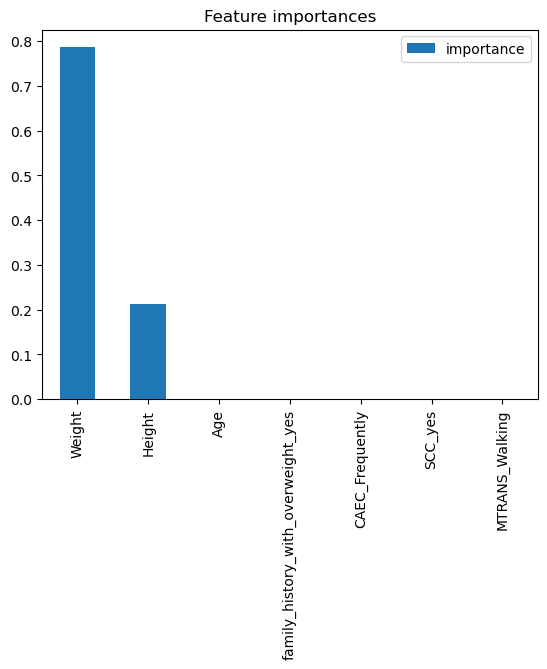

In [980]:
# Graficamos la importancia de las variables del arbol
plt.figure(figsize=(10, 5))
importances.plot(kind='bar')
plt.title('Feature importances')
plt.show()


### 5)	Realizar la mejor búsqueda paramétrica para lograr el mejor modelo de Bagging y Random Forest según Accuracy

### Bagging

In [981]:
# Hacemos la busqueda del mejor modelo de bagging usando gridsearchcv

# Separamos las variables predictoras de la variable objetivo
X = df2[var_model1]
y = df2[target]

# Dividimos el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Creamos el modelo
bagging = BaggingClassifier(random_state=seed)

# Definimos los hiperparámetros
param_grid = {
    'n_estimators': [10, 50, 100,250],
    'max_samples': [1,75,150,300],
    'max_features': [1,4,7,9],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}
# Definimos las métricas de evaluación
scoring_metrics = ['accuracy', 'roc_auc', 'precision_macro', 'recall_macro', 'f1_macro']

# Usamos GridSearchCV para encontrar el mejor modelo de bagging
grid = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5, scoring=scoring_metrics, refit='accuracy')
grid.fit(X_train, y_train)



c:\Users\charly\anaconda3\envs\ML1\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\charly\anaconda3\envs\ML1\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\charly\anaconda3\envs\ML1\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\charly\anaconda3\envs\ML1\lib\site-packages\sklearn\met

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=3314),
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [1, 4, 7, 9],
                         'max_samples': [1, 75, 150, 300],
                         'n_estimators': [10, 50, 100, 250]},
             refit='accuracy',
             scoring=['accuracy', 'roc_auc', 'precision_macro', 'recall_macro',
                      'f1_macro'])

In [982]:
# Obtener el mejor modelo
best_model = grid.best_estimator_
print(grid.best_estimator_)
y_pred_rf = best_model.predict(X_test)
accuracy_rf_gs = accuracy_score(y_test, y_pred_rf)

# Evaluar el rendimiento del modelo
print(f'Precisión del modelo: {accuracy_rf_gs}')

BaggingClassifier(bootstrap=False, max_features=7, max_samples=300,
                  n_estimators=50, random_state=3314)
Precisión del modelo: 0.967391304347826


In [983]:
# Se procede a observar el posible sobreajuste comparando predicciones en train y test.
# predicciones significativamente mayores en train que en test puede indicar sobreajuste.
# Predicciones en conjunto de entrenamiento y prueba
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(f'Se tiene un accuracy para train de: {accuracy_score(y_train,y_train_pred)}')
print(f'Se tiene un accuracy para test de: {accuracy_score(y_test,y_test_pred)}')
print('Comprobar que la diferencia no sea muy grande por temas de sobreajuste')

Se tiene un accuracy para train de: 1.0
Se tiene un accuracy para test de: 0.967391304347826
Comprobar que la diferencia no sea muy grande por temas de sobreajuste


In [984]:
print('Resultados para Modelo')
print(classification_report(y_test, y_test_pred))

Resultados para Modelo
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       101
           1       0.93      1.00      0.97        83

    accuracy                           0.97       184
   macro avg       0.97      0.97      0.97       184
weighted avg       0.97      0.97      0.97       184



In [985]:
# Mostramos como se distribuye la variable target en la parte train y test
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


(Obesity
 1    0.504076
 0    0.495924
 Name: proportion, dtype: float64,
 Obesity
 0    0.548913
 1    0.451087
 Name: proportion, dtype: float64)

In [986]:
# Mostramos los resultados ordenando de mayor a menor por accuracy
results = pd.DataFrame(grid.cv_results_).sort_values(by='mean_test_accuracy', ascending=False)
results[['param_n_estimators', 'param_max_samples', 'param_max_features', 'param_bootstrap', 'param_bootstrap_features', 'mean_test_accuracy', 'mean_test_roc_auc', 'mean_test_precision_macro', 'mean_test_recall_macro', 'mean_test_f1_macro']].head(10)

,param_n_estimators,param_max_samples,param_max_features,param_bootstrap,param_bootstrap_features,mean_test_accuracy,mean_test_roc_auc,mean_test_precision_macro,mean_test_recall_macro,mean_test_f1_macro
239,250,300,7,False,False,0.987764,0.999335,0.988132,0.987727,0.987757
238,100,300,7,False,False,0.987764,0.999409,0.988132,0.987727,0.987757
237,50,300,7,False,False,0.987764,0.999223,0.988132,0.987727,0.987757
109,50,300,7,True,False,0.986422,0.999335,0.986745,0.986411,0.986416
110,100,300,7,True,False,0.985062,0.999373,0.985394,0.985060,0.985055
111,250,300,7,True,False,0.985062,0.999373,0.985394,0.985060,0.985055
236,10,300,7,False,False,0.985052,0.997708,0.985517,0.984987,0.985044
108,10,300,7,True,False,0.982331,0.998932,0.982834,0.982376,0.982324
235,250,150,7,False,False,0.978268,0.999042,0.978964,0.978211,0.978247
234,100,150,7,False,False,0.976908,0.999078,0.977760,0.976860,0.976889


In [987]:
# Se seleccionan los 3 modelos candidatos y se analiza su robustez a lo largo de cross validation.
bagging_1 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[0]
bagging_2 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[4]
bagging_3 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[6]

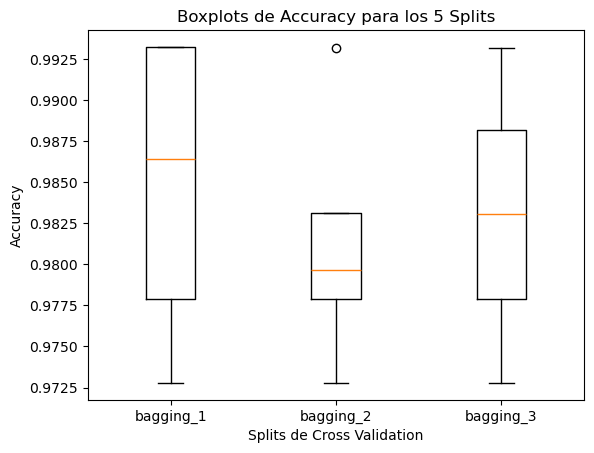

In [988]:
# Crear un boxplot para los 3 valores de accuracy
plt.boxplot([bagging_1.values,bagging_2.values,bagging_3.values], labels = ['bagging_1','bagging_2','bagging_3'])
plt.title('Boxplots de Accuracy para los 5 Splits')
plt.xlabel('Splits de Cross Validation')
plt.ylabel('Accuracy')
plt.show()


In [989]:
# Seleccionamos el bagging_2 ya que tiene una mayor precisión y menor varianza


Área bajo la curva ROC (AUC) para el bagging 2 en test: 1.00


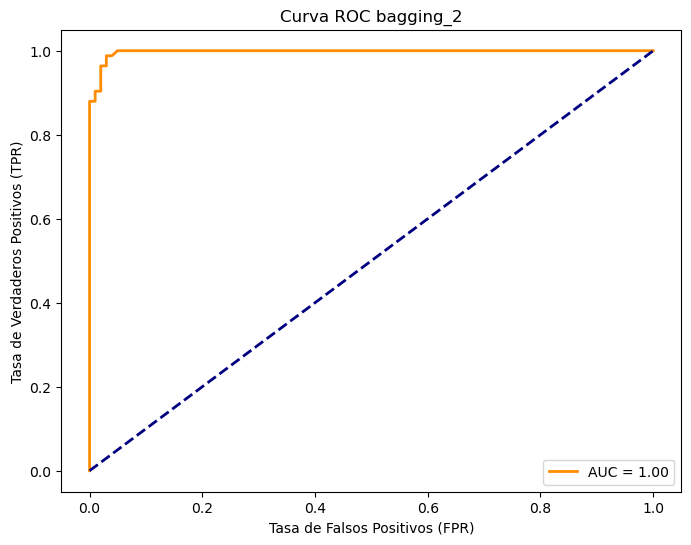

In [990]:
# Hacemos predicciones con el mejor modelo de bagging
bagging = BaggingClassifier(**results.iloc[4].params)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bagging)
roc_auc = auc(fpr, tpr)
print(f"\nÁrea bajo la curva ROC (AUC) para el bagging 2 en test: {roc_auc:.2f}")

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC bagging_2')
plt.legend(loc="lower right")
plt.show()


In [991]:
# Hacemos predicciones
bagging = BaggingClassifier(**results.iloc[4].params)
predictor = bagging.fit(X_train, y_train).predict(X_test)

# Matriz de confusión
print(confusion_matrix(y_test, predictor))

[[95  6]
 [ 1 82]]


### RandomForest

In [992]:
# Hacemos la busqueda del mejor modelo de random forest usando gridsearchcv

# Separamos las variables predictoras de la variable objetivo
X = df2[var_model1]
y = df2[target]

# Dividimos el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Creamos el modelo
forest = RandomForestClassifier(random_state=seed)

# Definimos los hiperparámetros
param_grid = {
    'n_estimators': [50, 100,250],
    'max_depth': [6,7,8],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2, 5, 7],
    'bootstrap': [True, False]

}

# Definimos las métricas de evaluación
scoring_metrics = ['accuracy', 'roc_auc', 'precision_macro', 'recall_macro', 'f1_macro']

# Usamos GridSearchCV para encontrar el mejor modelo de random forest
grid = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, scoring=scoring_metrics, refit='accuracy')
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=3314),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [50, 100, 250]},
             refit='accuracy',
             scoring=['accuracy', 'roc_auc', 'precision_macro', 'recall_macro',
                      'f1_macro'])

In [993]:
# En cuanto a la elección de hiperparámetros en un primer entrenamiento del modelo, los mejores modelos tenína param_max_depth = 4, indicador de que 
# aumentando el rango de este hiperparámetro se podría mejorar el modelo. Por tanto lo ampliamos hasta 7. Igual pasaba con param_min_samples leaf.
# Idealmente, esto se podría hacer infinitamente
# hasta encontrar el valor del parámetro ideal.

In [994]:
# Obtener el mejor modelo
best_model_RF = grid.best_estimator_
print(grid.best_estimator_)
y_pred_rf = best_model_RF.predict(X_test)
accuracy_rf_gs = accuracy_score(y_test, y_pred_rf)

# Evaluar el rendimiento del modelo
print(f'Precisión del modelo: {accuracy_rf_gs}')

RandomForestClassifier(max_depth=8, min_samples_split=7, n_estimators=50,
                       random_state=3314)
Precisión del modelo: 0.9619565217391305


In [995]:
# Se procede a observar el posible sobreajuste comparando predicciones en train y test.
# predicciones significativamente mayores en train que en test puede indicar sobreajuste.
# Predicciones en conjunto de entrenamiento y prueba
y_train_pred = best_model_RF.predict(X_train)
y_test_pred = best_model_RF.predict(X_test)
print(f'Se tiene un accuracy para train de: {accuracy_score(y_train,y_train_pred)}')
print(f'Se tiene un accuracy para test de: {accuracy_score(y_test,y_test_pred)}')
print('Comprobar que la diferencia no sea muy grande por temas de sobreajuste')

Se tiene un accuracy para train de: 0.998641304347826
Se tiene un accuracy para test de: 0.9619565217391305
Comprobar que la diferencia no sea muy grande por temas de sobreajuste


In [996]:
print('Resultados para Modelo')
print(classification_report(y_test, y_test_pred))

Resultados para Modelo
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       101
           1       0.92      1.00      0.96        83

    accuracy                           0.96       184
   macro avg       0.96      0.97      0.96       184
weighted avg       0.96      0.96      0.96       184



In [997]:
# Mostramos como se distribuye la variable target en la parte train y test
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


(Obesity
 1    0.504076
 0    0.495924
 Name: proportion, dtype: float64,
 Obesity
 0    0.548913
 1    0.451087
 Name: proportion, dtype: float64)

In [998]:
# Mostramos los resultados ordenando de mayor a menor por accuracy
results = pd.DataFrame(grid.cv_results_).sort_values(by='mean_test_accuracy', ascending=False)
results[['param_n_estimators', 'param_max_depth', 'param_criterion', 'param_min_samples_leaf', 'param_min_samples_split', 'param_bootstrap', 'mean_test_accuracy', 'mean_test_roc_auc', 'mean_test_precision_macro', 'mean_test_recall_macro', 'mean_test_f1_macro']].head(10)


,param_n_estimators,param_max_depth,param_criterion,param_min_samples_leaf,param_min_samples_split,param_bootstrap,mean_test_accuracy,mean_test_roc_auc,mean_test_precision_macro,mean_test_recall_macro,mean_test_f1_macro
141,50,8,entropy,1,7,True,0.989143,0.998933,0.989278,0.989151,0.989142
60,50,8,gini,1,7,True,0.989143,0.998857,0.989206,0.989151,0.989142
135,50,8,entropy,1,2,True,0.989134,0.998895,0.989314,0.989133,0.989132
112,100,7,entropy,1,5,True,0.989134,0.998747,0.989188,0.989152,0.989133
136,100,8,entropy,1,2,True,0.989134,0.999191,0.989170,0.989133,0.989133
138,50,8,entropy,1,5,True,0.987783,0.999190,0.987963,0.987800,0.987781
54,50,8,gini,1,2,True,0.987783,0.999262,0.987907,0.987781,0.987781
139,100,8,entropy,1,5,True,0.987783,0.999154,0.987837,0.987818,0.987782
111,50,7,entropy,1,5,True,0.987773,0.998524,0.987817,0.987782,0.987772
58,100,8,gini,1,5,True,0.987773,0.999115,0.987989,0.987745,0.987768


In [999]:
# Se seleccionan los 3 modelos candidatos y se analiza su robustez a lo largo de cross validation.
forest_1 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[0]
forest_2 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[2]
forest_3 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[5]


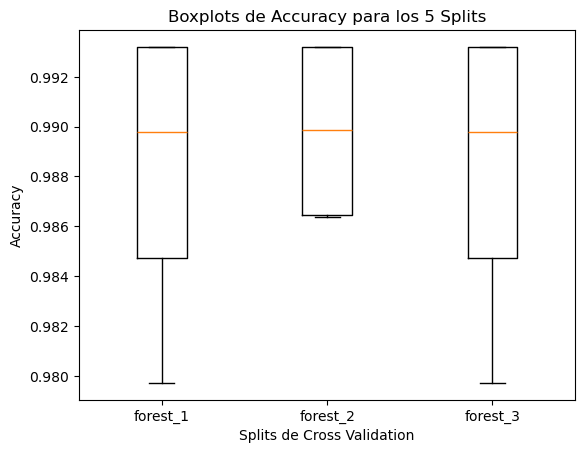

In [1000]:
# Crear un boxplot para los tres valores de accuracy
plt.boxplot([forest_1.values,forest_2.values,forest_3.values], labels = ['forest_1','forest_2','forest_3'])
plt.title('Boxplots de Accuracy para los 5 Splits')
plt.xlabel('Splits de Cross Validation')
plt.ylabel('Accuracy')
plt.show()


In [1001]:
# Por tanto forest_2 es el mejor modelo ya que tiene una mayor precisión y menor varianza

In [1002]:
# Hacemos predicciones
forest = RandomForestClassifier(**results.iloc[2].params)
forest.fit(X_train, y_train)  # Fit the model
predictor = forest.predict(X_test)

# Matriz de confusión
print(confusion_matrix(y_test, predictor))

[[95  6]
 [ 0 83]]


### Gradient Boosting

In [1003]:
# Hacemos la busqueda del mejor modelo de Gradient Boosting usando gridsearchcv

# Separamos las variables predictoras de la variable objetivo
X = df2[var_model1]
y = df2[target]

# Dividimos el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Creamos el modelo
gradient = GradientBoostingClassifier(random_state=seed)

# Definimos los hiperparámetros
params = {
    'n_estimators': [400,600],
    'n_iter_no_change': [None,5,10],
    'max_depth': [5, 10],
    'min_samples_leaf' : [30],
    'min_samples_split': [5, 10, 50],
}

# Definimos las métricas de evaluación
scoring_metrics = ['accuracy', 'roc_auc', 'precision_macro', 'recall_macro', 'f1_macro']

# Usamos GridSearchCV para encontrar el mejor modelo de Gradient Boosting
grid = GridSearchCV(estimator=gradient, param_grid=params, cv=5, scoring=scoring_metrics, refit='accuracy')
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=3314),
             param_grid={'max_depth': [5, 10], 'min_samples_leaf': [30],
                         'min_samples_split': [5, 10, 50],
                         'n_estimators': [400, 600],
                         'n_iter_no_change': [None, 5, 10]},
             refit='accuracy',
             scoring=['accuracy', 'roc_auc', 'precision_macro', 'recall_macro',
                      'f1_macro'])

In [1004]:
# Obtener el mejor modelo
best_model_GB = grid.best_estimator_
print(grid.best_estimator_)
y_pred_rf = best_model_GB.predict(X_test)
accuracy_rf_gs = accuracy_score(y_test, y_pred_rf)

# Evaluar el rendimiento del modelo
print(f'Precisión del modelo: {accuracy_rf_gs}')

GradientBoostingClassifier(max_depth=10, min_samples_leaf=30,
                           min_samples_split=5, n_estimators=400,
                           n_iter_no_change=10, random_state=3314)
Precisión del modelo: 0.967391304347826


In [1005]:
# Se procede a observar el posible sobreajuste comparando predicciones en train y test.
# predicciones significativamente mayores en train que en test puede indicar sobreajuste.
# Predicciones en conjunto de entrenamiento y prueba
y_train_pred = best_model_GB.predict(X_train)
y_test_pred = best_model_GB.predict(X_test)
print(f'Se tiene un accuracy para train de: {accuracy_score(y_train,y_train_pred)}')
print(f'Se tiene un accuracy para test de: {accuracy_score(y_test,y_test_pred)}')
print('Comprobar que la diferencia no sea muy grande por temas de sobreajuste')


Se tiene un accuracy para train de: 0.9972826086956522
Se tiene un accuracy para test de: 0.967391304347826
Comprobar que la diferencia no sea muy grande por temas de sobreajuste


In [1006]:
# Mostramos como se distribuye la variable target en la parte train y test
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


(Obesity
 1    0.504076
 0    0.495924
 Name: proportion, dtype: float64,
 Obesity
 0    0.548913
 1    0.451087
 Name: proportion, dtype: float64)

In [1007]:
# Mostramos los resultados ordenando de mayor a menor por accuracy
results = pd.DataFrame(grid.cv_results_).sort_values(by='mean_test_accuracy', ascending=False)
results[['param_n_estimators', 'param_n_iter_no_change', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_accuracy', 'mean_test_roc_auc', 'mean_test_precision_macro', 'mean_test_recall_macro', 'mean_test_f1_macro']].head(10)

,param_n_estimators,param_n_iter_no_change,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_test_accuracy,mean_test_roc_auc,mean_test_precision_macro,mean_test_recall_macro,mean_test_f1_macro
35,600,10,10,50,30,0.989125,0.999522,0.989381,0.989078,0.989121
32,400,10,10,50,30,0.989125,0.999522,0.989381,0.989078,0.989121
23,600,10,10,5,30,0.989125,0.999522,0.989381,0.989078,0.989121
29,600,10,10,10,30,0.989125,0.999522,0.989381,0.989078,0.989121
20,400,10,10,5,30,0.989125,0.999522,0.989381,0.989078,0.989121
26,400,10,10,10,30,0.989125,0.999522,0.989381,0.989078,0.989121
16,600,5,5,50,30,0.987764,0.999560,0.988030,0.987727,0.987760
17,600,10,5,50,30,0.987764,0.999560,0.988030,0.987727,0.987760
25,400,5,10,10,30,0.987764,0.999596,0.988030,0.987727,0.987760
28,600,5,10,10,30,0.987764,0.999596,0.988030,0.987727,0.987760


In [1008]:
# Se seleccionan los 3 modelos candidatos y se analiza su robustez a lo largo de cross validation.
gradient_1 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[0]
gradient_2 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[3]
gradient_3 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[9]

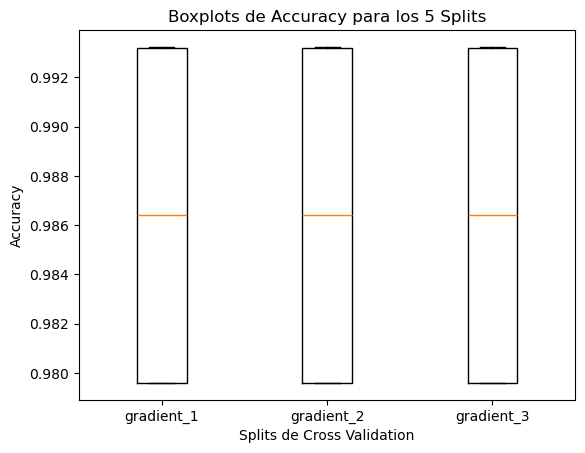

In [1009]:
# Crear un boxplot para los tres valores de accuracy
plt.boxplot([gradient_1.values,gradient_2.values,gradient_3.values], labels = ['gradient_1','gradient_2','gradient_3'])
plt.title('Boxplots de Accuracy para los 5 Splits')
plt.xlabel('Splits de Cross Validation')
plt.ylabel('Accuracy')
plt.show()

In [1010]:
# Por tanto podemos seleccionar indistinvamente 

In [1011]:
# Hacemos predicciones
gradient = GradientBoostingClassifier(**results.iloc[3].params)
predictor = gradient.fit(X_train, y_train).predict(X_test)

# Matriz de confusión
print(confusion_matrix(y_test, predictor))

[[95  6]
 [ 0 83]]



Área bajo la curva ROC (AUC) para el Gradient Boosting 2 en test: 1.00


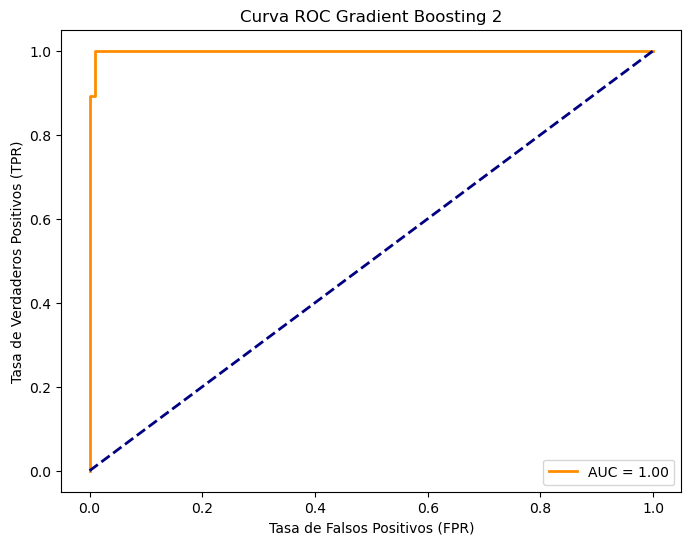

In [1012]:
# Representamos la curva ROC
y_pred_gb = gradient.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)
roc_auc = auc(fpr, tpr)
print(f"\nÁrea bajo la curva ROC (AUC) para el Gradient Boosting 2 en test: {roc_auc:.2f}")

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Gradient Boosting 2')
plt.legend(loc="lower right")
plt.show()

### XGBoost

In [1013]:
# Hacemos la busqueda del mejor modelo de XGBoost usando gridsearchcv

# Separamos las variables predictoras de la variable objetivo
X = df2[var_model1]
y = df2[target]

# Dividimos el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Creamos el modelo
xgb = XGBClassifier(random_state=seed)

# Definimos los hiperparámetros
param_grid = {
    'n_estimators': [100,200,300],
    'eta' : [0.1,0.4,0.7],
    'gamma' : [0.1,0.5,1],
    'max_depth': [5, 10]
}

# Definimos las métricas de evaluación
scoring_metrics = ['accuracy', 'roc_auc', 'precision_macro', 'recall_macro', 'f1_macro']

# Usamos GridSearchCV para encontrar el mejor modelo de XGBoost
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring=scoring_metrics, refit='accuracy')
grid.fit(X_train, y_train)





GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=3314, ...),
             param_grid={'eta': [0.1, 0.4, 0.7], 'gamma': [0.1, 0.5, 1],
                         'max_depth': [5, 10],
                         'n_estimators': [100, 200, 300]},
             refit='accuracy',
             scoring=['accuracy', 'roc_auc', 'precision_macro', 'recall_macro',
                      'f1_macro'])

In [1014]:
# Obtener el mejor modelo
best_model_XGB = grid.best_estimator_
print(grid.best_estimator_)
y_pred_rf = best_model_XGB.predict(X_test)
accuracy_rf_gs = accuracy_score(y_test, y_pred_rf)

# Evaluar el rendimiento del modelo
print(f'Precisión del modelo: {accuracy_rf_gs}')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.4, eval_metric=None,
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)
Precisión del modelo: 0.9619565217391305


In [1015]:
# Se procede a observar el posible sobreajuste comparando predicciones en train y test.
# predicciones significativamente mayores en train que en test puede indicar sobreajuste.
# Predicciones en conjunto de entrenamiento y prueba
y_train_pred = best_model_XGB.predict(X_train)
y_test_pred = best_model_XGB.predict(X_test)
print(f'Se tiene un accuracy para train de: {accuracy_score(y_train,y_train_pred)}')
print(f'Se tiene un accuracy para test de: {accuracy_score(y_test,y_test_pred)}')
print('Comprobar que la diferencia no sea muy grande por temas de sobreajuste')

Se tiene un accuracy para train de: 1.0
Se tiene un accuracy para test de: 0.9619565217391305
Comprobar que la diferencia no sea muy grande por temas de sobreajuste


In [1016]:
# Mostramos como se distribuye la variable target en la parte train y test
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


(Obesity
 1    0.504076
 0    0.495924
 Name: proportion, dtype: float64,
 Obesity
 0    0.548913
 1    0.451087
 Name: proportion, dtype: float64)

In [1017]:
# Mostramos los resultados ordenando de mayor a menor por accuracy
results = pd.DataFrame(grid.cv_results_).sort_values(by='mean_test_accuracy', ascending=False)
results[['param_n_estimators', 'param_eta', 'param_gamma', 'param_max_depth', 'mean_test_accuracy', 'mean_test_roc_auc', 'mean_test_precision_macro', 'mean_test_recall_macro', 'mean_test_f1_macro']].head(10)

,param_n_estimators,param_eta,param_gamma,param_max_depth,mean_test_accuracy,mean_test_roc_auc,mean_test_precision_macro,mean_test_recall_macro,mean_test_f1_macro
34,200,0.4,1,10,0.986422,0.998550,0.986638,0.986411,0.986417
35,300,0.4,1,10,0.986422,0.998550,0.986638,0.986411,0.986417
30,100,0.4,1,5,0.986422,0.998550,0.986638,0.986411,0.986417
31,200,0.4,1,5,0.986422,0.998550,0.986638,0.986411,0.986417
32,300,0.4,1,5,0.986422,0.998550,0.986638,0.986411,0.986417
33,100,0.4,1,10,0.986422,0.998550,0.986638,0.986411,0.986417
0,100,0.1,0.1,5,0.985071,0.999523,0.985327,0.985078,0.985067
3,100,0.1,0.1,10,0.985071,0.999486,0.985327,0.985078,0.985067
48,100,0.7,1,5,0.985062,0.999248,0.985166,0.985079,0.985059
49,200,0.7,1,5,0.985062,0.999248,0.985166,0.985079,0.985059


In [1018]:
# Se seleccionan los 3 modelos candidatos y se analiza su robustez a lo largo de cross validation.
xgb_1 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[0]
xgb_2 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[6]
xgb_3 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[27]


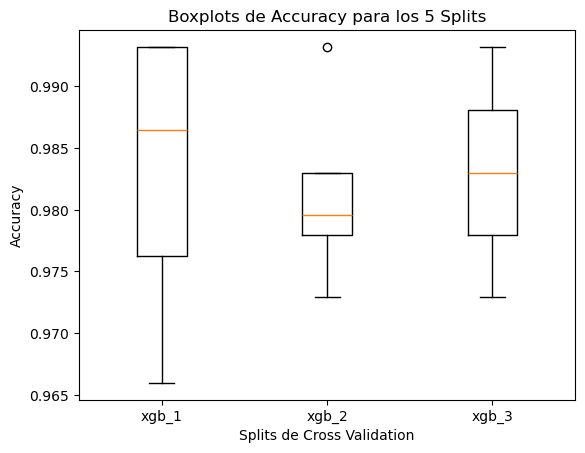

In [1019]:
# Crear un boxplot para los tres valores de accuracy
plt.boxplot([xgb_1.values,xgb_2.values,xgb_3.values], labels = ['xgb_1','xgb_2','xgb_3'])
plt.title('Boxplots de Accuracy para los 5 Splits')
plt.xlabel('Splits de Cross Validation')
plt.ylabel('Accuracy')
plt.show()


In [1020]:
# Por tanto seleccionamos el xgb_2 ya que tiene una mayor precisión y menor varianza

In [1021]:
# Hacemos predicciones
xgb = XGBClassifier(**results.iloc[6].params)
predictor = xgb.fit(X_train, y_train).predict(X_test)

# Matriz de confusión
print(confusion_matrix(y_test, predictor))

[[96  5]
 [ 0 83]]


### SVM

In [1022]:
# Hacemos una busqueda del mejor modelo de SV con al menos dos kernels usando gridsearchcv

# Separamos las variables predictoras de la variable objetivo
X = df2[var_model1]
y = df2[target]

# Dividimos el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Creamos el modelo
svc = SVC(random_state=seed)

# Definimos los hiperparámetros
param_grid = {
    'C': [10,11,12],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2,3,4],
    'gamma': ['scale', 'auto']
}

# Definimos las métricas de evaluación
scoring_metrics = ['accuracy', 'roc_auc', 'precision_macro', 'recall_macro', 'f1_macro']

# Usamos GridSearchCV para encontrar el mejor modelo de SVM
grid = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring=scoring_metrics, refit='accuracy')
grid.fit(X_train, y_train)




GridSearchCV(cv=5, estimator=SVC(random_state=3314),
             param_grid={'C': [10, 11, 12], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             refit='accuracy',
             scoring=['accuracy', 'roc_auc', 'precision_macro', 'recall_macro',
                      'f1_macro'])

In [1023]:
# Obtener el mejor modelo
best_model_SVC = grid.best_estimator_
print(grid.best_estimator_)
y_pred_rf = best_model_SVC.predict(X_test)
accuracy_rf_gs = accuracy_score(y_test, y_pred_rf)

# Evaluar el rendimiento del modelo
print(f'Precisión del modelo: {accuracy_rf_gs}')

SVC(C=10, degree=2, kernel='linear', random_state=3314)
Precisión del modelo: 0.9891304347826086


In [1024]:
# Se procede a observar el posible sobreajuste comparando predicciones en train y test.
# predicciones significativamente mayores en train que en test puede indicar sobreajuste.
# Predicciones en conjunto de entrenamiento y prueba
y_train_pred = best_model_SVC.predict(X_train)
y_test_pred = best_model_SVC.predict(X_test)
print(f'Se tiene un accuracy para train de: {accuracy_score(y_train,y_train_pred)}')
print(f'Se tiene un accuracy para test de: {accuracy_score(y_test,y_test_pred)}')
print('Comprobar que la diferencia no sea muy grande por temas de sobreajuste')

Se tiene un accuracy para train de: 0.9972826086956522
Se tiene un accuracy para test de: 0.9891304347826086
Comprobar que la diferencia no sea muy grande por temas de sobreajuste


In [1025]:
# Mostramos como se distribuye la variable target en la parte train y test
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


(Obesity
 1    0.504076
 0    0.495924
 Name: proportion, dtype: float64,
 Obesity
 0    0.548913
 1    0.451087
 Name: proportion, dtype: float64)

In [1026]:
# Mostramos los resultados ordenando de mayor a menor por accuracy
results = pd.DataFrame(grid.cv_results_).sort_values(by='mean_test_accuracy', ascending=False)
results[['param_C', 'param_kernel', 'param_degree', 'param_gamma', 'mean_test_accuracy', 'mean_test_roc_auc', 'mean_test_precision_macro', 'mean_test_recall_macro', 'mean_test_f1_macro']].head(10)

,param_C,param_kernel,param_degree,param_gamma,mean_test_accuracy,mean_test_roc_auc,mean_test_precision_macro,mean_test_recall_macro,mean_test_f1_macro
0,10,linear,2,scale,0.993216,0.999852,0.993385,0.993206,0.993214
15,10,linear,4,auto,0.993216,0.999852,0.993385,0.993206,0.993214
51,12,linear,4,auto,0.993216,0.999889,0.993385,0.993206,0.993214
48,12,linear,4,scale,0.993216,0.999889,0.993385,0.993206,0.993214
45,12,linear,3,auto,0.993216,0.999889,0.993385,0.993206,0.993214
42,12,linear,3,scale,0.993216,0.999889,0.993385,0.993206,0.993214
39,12,linear,2,auto,0.993216,0.999889,0.993385,0.993206,0.993214
36,12,linear,2,scale,0.993216,0.999889,0.993385,0.993206,0.993214
33,11,linear,4,auto,0.993216,0.999889,0.993385,0.993206,0.993214
30,11,linear,4,scale,0.993216,0.999889,0.993385,0.993206,0.993214


In [1027]:
# Se seleccionan los 3 modelos candidatos y se analiza su robustez a lo largo de cross validation.
svc_1 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[0]
svc_2 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[6]
svc_3 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[7]

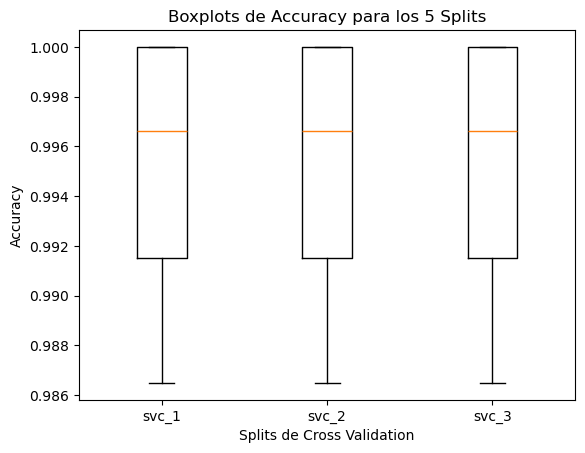

In [1028]:
# Crear un boxplot para los tres valores de accuracy
plt.boxplot([svc_1.values,svc_2.values,svc_3.values], labels = ['svc_1','svc_2','svc_3'])
plt.title('Boxplots de Accuracy para los 5 Splits')
plt.xlabel('Splits de Cross Validation')
plt.ylabel('Accuracy')
plt.show()


In [1029]:
# En este caso nos quedamos con el tercer modelo ya que es mas preciso y tiene menor varianza

In [1030]:
# Hacemos predicciones
svc = SVC(**results.iloc[7].params)
predictor = svc.fit(X_train, y_train).predict(X_test)

# Matriz de confusión
print(confusion_matrix(y_test, predictor))

[[99  2]
 [ 0 83]]



Área bajo la curva ROC (AUC) para el SVC 3 en test: 0.99


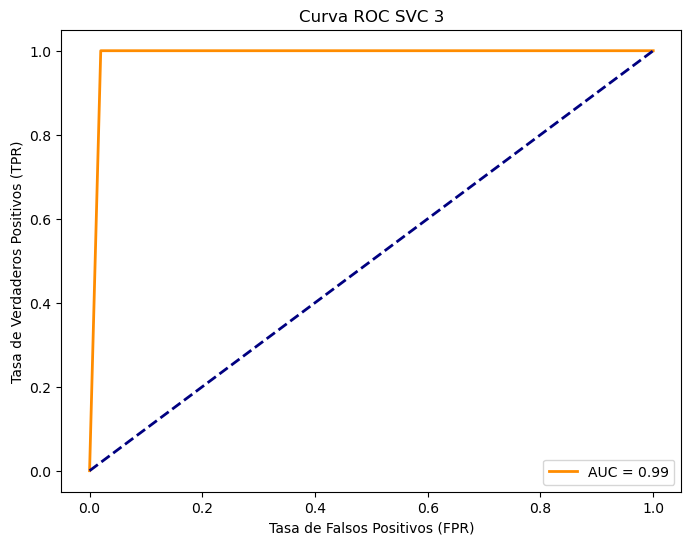

In [1031]:
# Hacemos la curva ROC
y_pred_svc = svc.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)
roc_auc = auc(fpr, tpr)
print(f"\nÁrea bajo la curva ROC (AUC) para el SVC 3 en test: {roc_auc:.2f}")

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC SVC 3')
plt.legend(loc="lower right")
plt.show()


### Ensamblado de Bagging con un mismo clasificador base que no sea un árbol

In [1032]:
# Realizar un método de ensamblado de Bagging con un mismo clasificador base que no sea un árbol

# Separamos las variables predictoras de la variable objetivo
X = df2[var_model1]
y = df2[target]

# Dividimos el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Creamos el modelo base
logistic = LogisticRegression(random_state=seed)

# Creamos el modelo de Bagging
bagging = BaggingClassifier(estimator=logistic, n_estimators=10, random_state=seed)

# Entrenamos el modelo
bagging.fit(X_train, y_train)



BaggingClassifier(estimator=LogisticRegression(random_state=3314),
                  random_state=3314)

In [1033]:
# Hacemos predicciones
y_pred = bagging.predict(X_test)

In [1034]:
# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)

# Se procede a observar el posible sobreajuste comparando predicciones en train y test.
# predicciones significativamente mayores en train que en test puede indicar sobreajuste.
# Predicciones en conjunto de entrenamiento y prueba
y_train_pred = bagging.predict(X_train)
y_test_pred = bagging.predict(X_test)
print(f'Se tiene un accuracy para train de: {accuracy_score(y_train,y_train_pred)}')
print(f'Se tiene un accuracy para test de: {accuracy_score(y_test,y_test_pred)}')
print('Comprobar que la diferencia no sea muy grande por temas de sobreajuste')


Se tiene un accuracy para train de: 0.96875
Se tiene un accuracy para test de: 0.9456521739130435
Comprobar que la diferencia no sea muy grande por temas de sobreajuste


In [1035]:
# Mostramos como se distribuye la variable target en la parte train y test
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(Obesity
 1    0.504076
 0    0.495924
 Name: proportion, dtype: float64,
 Obesity
 0    0.548913
 1    0.451087
 Name: proportion, dtype: float64)

In [1036]:
# Mostramos los resultados del modelo
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.98      0.92      0.95       101
           1       0.91      0.98      0.94        83

    accuracy                           0.95       184
   macro avg       0.94      0.95      0.95       184
weighted avg       0.95      0.95      0.95       184



In [1037]:
# Mostramos la matriz de confusión donde indica los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos
confusion_matrix(y_test, y_test_pred)

array([[93,  8],
       [ 2, 81]], dtype=int64)

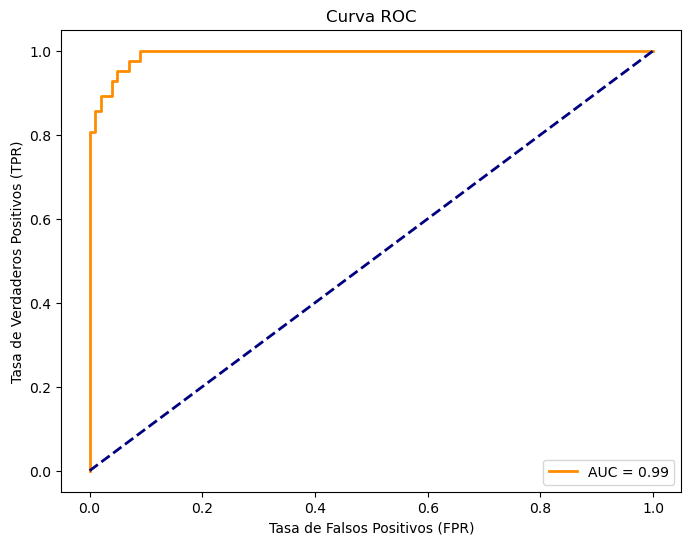

In [1038]:
# Representamos la curva ROC
y_pred_proba = bagging.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### Stacking

In [1039]:
# Stacking escogiendo varios algoritmos de entrada y el modelo que se prefiera como modelo de ensamblaje

# Separamos las variables predictoras de la variable objetivo
X = df2[var_model1]
y = df2[target]

# Dividimos el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Creamos los modelos base
rf = RandomForestClassifier(random_state=seed)
gb = GradientBoostingClassifier(random_state=seed)
dt = DecisionTreeClassifier(random_state=seed)

# Creamos el modelo de Stacking con un random forest como modelo final
stacking = StackingClassifier(estimators=[('rf', rf), ('gb', gb), ('dt', dt)], final_estimator=rf)

# Entrenamos el modelo
stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(random_state=3314)),
                               ('gb',
                                GradientBoostingClassifier(random_state=3314)),
                               ('dt',
                                DecisionTreeClassifier(random_state=3314))],
                   final_estimator=RandomForestClassifier(random_state=3314))

In [1040]:
# Hacemos predicciones
y_pred = stacking.predict(X_test)

In [1041]:
# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)

# Se procede a observar el posible sobreajuste comparando predicciones en train y test.
# predicciones significativamente mayores en train que en test puede indicar sobreajuste.
# Predicciones en conjunto de entrenamiento y prueba
y_train_pred = stacking.predict(X_train)
y_test_pred = stacking.predict(X_test)  
print(f'Se tiene un accuracy para train de: {accuracy_score(y_train,y_train_pred)}')
print(f'Se tiene un accuracy para test de: {accuracy_score(y_test,y_test_pred)}')
print('Comprobar que la diferencia no sea muy grande por temas de sobreajuste')

Se tiene un accuracy para train de: 0.998641304347826
Se tiene un accuracy para test de: 0.9619565217391305
Comprobar que la diferencia no sea muy grande por temas de sobreajuste


In [1042]:
# Mostramos como se distribuye la variable target en la parte train y test
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(Obesity
 1    0.504076
 0    0.495924
 Name: proportion, dtype: float64,
 Obesity
 0    0.548913
 1    0.451087
 Name: proportion, dtype: float64)

In [1043]:
# Mostramos los resultados del modelo
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       101
           1       0.93      0.99      0.96        83

    accuracy                           0.96       184
   macro avg       0.96      0.96      0.96       184
weighted avg       0.96      0.96      0.96       184



In [1044]:
# Mostramos la matriz de confusión
confusion_matrix(y_test, y_test_pred)

array([[95,  6],
       [ 1, 82]], dtype=int64)

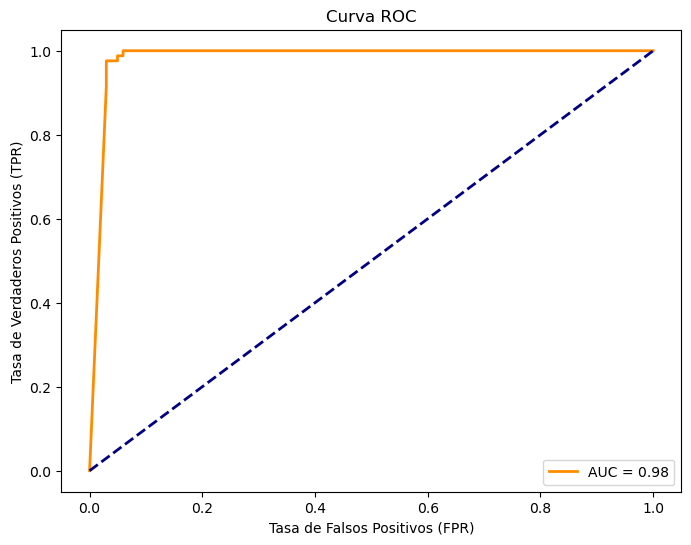

In [1045]:
# Representamos la curva ROC
y_pred_proba = stacking.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
